## 필요한 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('./dataset/분기추가.csv',encoding = 'cp949')
df.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q


In [2]:
df1 = pd.read_csv('ex_cust.csv',encoding = 'utf-8-sig')
df1=df1[['Unnamed: 0']]
df1.columns=['고객번호']
df1

,고객번호
0,1
1,2
2,3
3,4
4,6
...,...
18861,19333
18862,19334
18863,19335
18864,19336


In [3]:
df_cust=pd.read_csv('./dataset/PRODCL2.csv',encoding = 'utf8')
df_cust.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,상품분류,소비재분류
0,A,1,101,A010101,일용잡화,위생세제,생활잡화,편의품
1,A,1,101,A010102,일용잡화,휴지류,생활잡화,편의품
2,A,1,101,A010103,일용잡화,뷰티상품,생활잡화,편의품
3,A,1,101,A010104,일용잡화,일용잡화,생활잡화,편의품
4,A,1,101,A010105,일용잡화,세트상품,생활잡화,편의품


In [4]:
df_cust=df_cust[['소분류코드','상품분류','소비재분류']]
df_cust

,소분류코드,상품분류,소비재분류
0,A010101,생활잡화,편의품
1,A010102,생활잡화,편의품
2,A010103,생활잡화,편의품
3,A010104,생활잡화,편의품
4,A010105,생활잡화,편의품
...,...,...,...
4381,D080204,화장품,편의품
4382,D080205,화장품,편의품
4383,D080301,화장품,편의품
4384,D080302,화장품,편의품


In [5]:
df_new=pd.merge(df, df_cust, how='left', left_on='소분류코드',right_on='소분류코드')
df_new

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,6937011,13,1305,B130502,18575,11,20151228,17,2735,2015,월요일,12,8Q,기호품,편의품
28593026,B,10561833,10,1003,B100305,15886,116,20150526,20,4847,2015,화요일,5,6Q,식료품,편의품
28593027,B,10561838,14,1402,B140201,11525,116,20150526,16,4504,2015,화요일,5,6Q,식료품,편의품
28593028,B,8233755,21,2108,B210802,9470,32,20150117,16,627,2015,토요일,1,5Q,생활잡화,편의품


In [19]:
## 기존고객데이터
df_ex = pd.read_csv('ex_cust.csv',encoding = 'utf-8-sig')
df_ex=df_ex[['Unnamed: 0']]
df_ex.columns=['고객번호']
df_ex

,고객번호
0,1
1,2
2,3
3,4
4,6
...,...
18861,19333
18862,19334
18863,19335
18864,19336


## 데이터프레임 만들기

In [26]:
# 데이터프레임 수정
def data_cat(df,y):
#     df = pd.read_csv(x,encoding = 'cp949')
#     df=df.reset_index()
    df_c=['고객번호']
    for i in range(1,9):
        t= y+str(i)
        df_c.append(t)
    df.columns=df_c
    df_main_n=pd.merge(df_ex,df, how='left', on='고객번호')
    df_main_n.fillna(0,inplace=True)
    return df_main_n

In [ ]:
# 제휴사별_A
df_A=df_new[df_new['제휴사']=='A']

In [80]:
#피벗테이블 생성-구매금액합
df_pivot_A_sum = pd.pivot_table(df_A,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수
df_pivot_A_sum.head()

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,8974372.0,10901831.0,12113989.0,20058580.0,9109367.0,8981582.0,8663959.0,4220424.0
2,13868266.0,10506625.0,16767689.0,6238430.0,18595496.0,9758265.0,15540382.0,9915866.0
3,NaN,82407.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1226561.0,3483583.0,2466962.0,1355085.0,1642632.0,1658471.0,1748518.0,1000993.0
5,3079419.0,2384470.0,2064490.0,353350.0,2138947.0,860499.0,NaN,2137443.0


In [79]:
#피벗테이블 생성-구매횟수
df_pivot_A_count = pd.pivot_table(df_A,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_pivot_A_count.head()

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,120.0,110.0,129.0,145.0,138.0,105.0,66.0,61.0
2,183.0,155.0,139.0,125.0,140.0,98.0,121.0,119.0
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,81.0,120.0,59.0,46.0,99.0,88.0,79.0,77.0
5,183.0,193.0,110.0,20.0,91.0,28.0,NaN,86.0


In [212]:
df_c=['고객번호']
for i in range(1,9):
    t= 'A_총구매액'+str(i)
    df_c.append(t)
df_A_all=pd.merge(df_ex,df_pivot_A_sum, how='left', on='고객번호')
df_A_all.columns=df_c
df_A_all.head()

,고객번호,A_총구매액1,A_총구매액2,A_총구매액3,A_총구매액4,A_총구매액5,A_총구매액6,A_총구매액7,A_총구매액8
0,1,8974372.0,10901831.0,12113989.0,20058580.0,9109367.0,8981582.0,8663959.0,4220424.0
1,2,13868266.0,10506625.0,16767689.0,6238430.0,18595496.0,9758265.0,15540382.0,9915866.0
2,3,NaN,82407.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1226561.0,3483583.0,2466962.0,1355085.0,1642632.0,1658471.0,1748518.0,1000993.0
4,6,1056050.0,2103394.0,2233041.0,1721084.0,2422858.0,2365637.0,2020858.0,1695049.0


In [213]:
df_c=['고객번호', 'A_총구매액1', 'A_총구매액2', 'A_총구매액3', 'A_총구매액4', 'A_총구매액5', 'A_총구매액6', 'A_총구매액7', 'A_총구매액8']
for i in range(1,9):
    t= 'A_구매횟수'+str(i)
    df_c.append(t)
df_c

['고객번호',
 'A_총구매액1',
 'A_총구매액2',
 'A_총구매액3',
 'A_총구매액4',
 'A_총구매액5',
 'A_총구매액6',
 'A_총구매액7',
 'A_총구매액8',
 'A_구매횟수1',
 'A_구매횟수2',
 'A_구매횟수3',
 'A_구매횟수4',
 'A_구매횟수5',
 'A_구매횟수6',
 'A_구매횟수7',
 'A_구매횟수8']

In [214]:
df_A_all=pd.merge(df_A_all,df_pivot_A_count, how='left', on='고객번호')
df_A_all.columns=df_c
df_A_all.head()

,고객번호,A_총구매액1,A_총구매액2,A_총구매액3,A_총구매액4,A_총구매액5,A_총구매액6,A_총구매액7,A_총구매액8,A_구매횟수1,A_구매횟수2,A_구매횟수3,A_구매횟수4,A_구매횟수5,A_구매횟수6,A_구매횟수7,A_구매횟수8
0,1,8974372.0,10901831.0,12113989.0,20058580.0,9109367.0,8981582.0,8663959.0,4220424.0,120.0,110.0,129.0,145.0,138.0,105.0,66.0,61.0
1,2,13868266.0,10506625.0,16767689.0,6238430.0,18595496.0,9758265.0,15540382.0,9915866.0,183.0,155.0,139.0,125.0,140.0,98.0,121.0,119.0
2,3,NaN,82407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1226561.0,3483583.0,2466962.0,1355085.0,1642632.0,1658471.0,1748518.0,1000993.0,81.0,120.0,59.0,46.0,99.0,88.0,79.0,77.0
4,6,1056050.0,2103394.0,2233041.0,1721084.0,2422858.0,2365637.0,2020858.0,1695049.0,37.0,51.0,44.0,49.0,50.0,42.0,35.0,53.0


(array([1.8806e+04, 5.0000e+01, 5.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 4.44285797e+07, 8.88571594e+07, 1.33285739e+08,
        1.77714319e+08, 2.22142898e+08, 2.66571478e+08, 3.11000058e+08,
        3.55428638e+08, 3.99857217e+08, 4.44285797e+08]),
 <BarContainer object of 10 artists>)

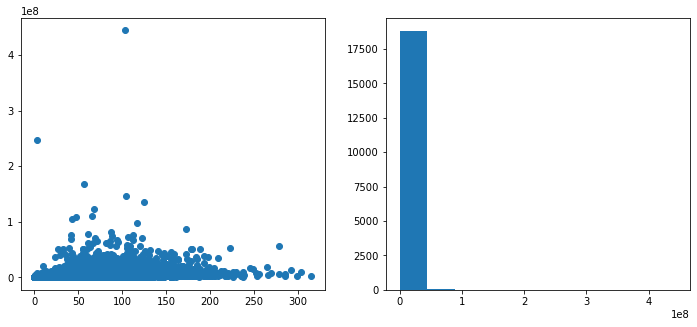

In [126]:
#분포확인
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df_A_all['A_구매횟수1'],df_A_all['A_총구매액1'])
ax2.hist(df_A_all['A_총구매액1'])

(array([5121.,    0.,    0.,   23.,  517., 1793., 3581., 5860., 1941.,
          30.]),
 array([ 0.        ,  1.99119786,  3.98239572,  5.97359358,  7.96479144,
         9.9559893 , 11.94718716, 13.93838502, 15.92958288, 17.92078074,
        19.9119786 ]),
 <BarContainer object of 10 artists>)

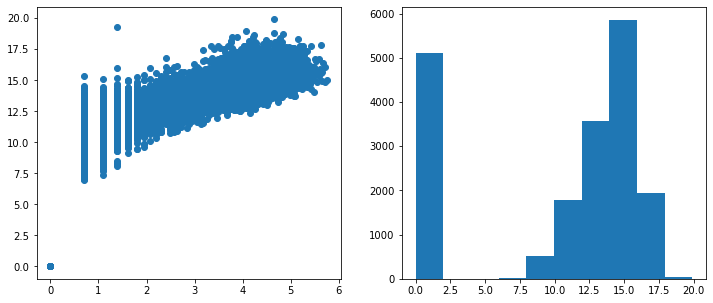

In [125]:
#로그변환
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

x=np.log1p(df_A_all['A_구매횟수1'])
y=np.log1p(df_A_all['A_총구매액1'])
ax1.scatter(x,y)
ax2.hist(y)

In [121]:
#데이터프레임에 로그변환 
df_A_all=df_A_all.fillna(0)
df_A_log=np.log1p(df_A_all)
df_A_log

,고객번호,A_총구매액1,A_총구매액2,A_총구매액3,A_총구매액4,A_총구매액5,A_총구매액6,A_총구매액7,A_총구매액8,A_구매횟수1,A_구매횟수2,A_구매횟수3,A_구매횟수4,A_구매횟수5,A_구매횟수6,A_구매횟수7,A_구매횟수8
0,0.693147,16.009884,16.204441,16.309872,16.814168,16.024814,16.010687,15.974682,15.255446,4.795791,4.709530,4.867534,4.983607,4.934474,4.663439,4.204693,4.127134
1,1.098612,16.445114,16.167517,16.634964,15.646239,16.738430,16.093625,16.558953,16.109647,5.214936,5.049856,4.941642,4.836282,4.948760,4.595120,4.804021,4.787492
2,1.386294,0.000000,11.319438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.609438,14.019726,15.063572,14.718498,14.119375,14.311811,14.321407,14.374280,13.816504,4.406719,4.795791,4.094345,3.850148,4.605170,4.488636,4.382027,4.356709
4,1.945910,13.870047,14.559063,14.618875,14.358465,14.700459,14.676558,14.519033,14.343223,3.637586,3.951244,3.806662,3.912023,3.931826,3.761200,3.583519,3.988984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,9.869620,12.957411,13.363524,13.034729,12.289743,12.660994,12.183530,12.151046,12.298907,4.248495,4.595120,3.871201,3.688879,4.127134,3.496508,3.401197,3.970292
18862,9.869672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.972052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000
18863,9.869724,0.000000,0.000000,11.721158,11.583468,11.160399,13.808043,0.000000,0.000000,0.000000,0.000000,0.693147,1.386294,1.098612,1.609438,0.000000,0.000000
18864,9.869776,13.000044,15.038158,15.088248,15.468059,14.886883,15.173278,15.774721,15.221130,2.197225,4.343805,4.394449,4.343805,4.127134,3.526361,3.931826,3.931826


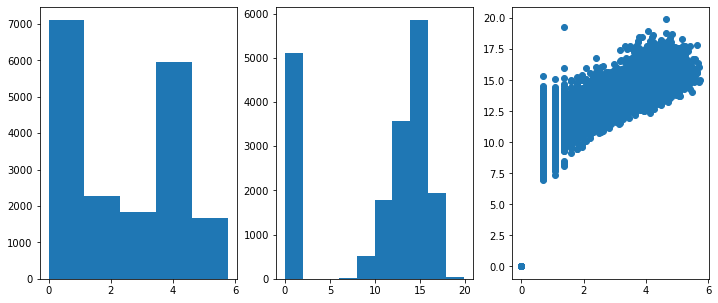

In [159]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_A_log['A_구매횟수1'],5)
ax2.hist(df_A_log['A_총구매액1'],10)
ax3.scatter(df_A_log['A_구매횟수1'],df_A_log['A_총구매액1'])

In [8]:
df_B=df_new[df_new['제휴사']=='B']
df_B

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,6937011,13,1305,B130502,18575,11,20151228,17,2735,2015,월요일,12,8Q,기호품,편의품
28593026,B,10561833,10,1003,B100305,15886,116,20150526,20,4847,2015,화요일,5,6Q,식료품,편의품
28593027,B,10561838,14,1402,B140201,11525,116,20150526,16,4504,2015,화요일,5,6Q,식료품,편의품
28593028,B,8233755,21,2108,B210802,9470,32,20150117,16,627,2015,토요일,1,5Q,생활잡화,편의품


In [186]:
#제휴사B분기별
df_pivot_B_sum = pd.pivot_table(df_B,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수
df_pivot_B_sum.head()

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,21452.0,NaN,5310.0,329407.0,191790.0,19838.0,125575.0,60646.0
2,30014.0,NaN,NaN,41193.0,95878.0,40427.0,NaN,NaN
3,NaN,NaN,7863.0,NaN,NaN,NaN,NaN,NaN
4,NaN,82468.0,243926.0,181660.0,74670.0,278841.0,528487.0,239732.0
5,15745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#제휴사B분기별
df_pivot_B_count = pd.pivot_table(df_B,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_pivot_B_count.head()

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,1.0,NaN,3.0,38.0,11.0,1.0,6.0,4.0
2,1.0,NaN,NaN,7.0,5.0,3.0,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,15.0,21.0,21.0,11.0,25.0,24.0,9.0
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df_c=['고객번호']
for i in range(1,9):
    t= 'B_총구매액'+str(i)
    df_c.append(t)
df_B_all=pd.merge(df_ex,df_pivot_B_sum, how='left', on='고객번호')
df_B_all.columns=df_c
df_B_all.head()

,고객번호,B_총구매액1,B_총구매액2,B_총구매액3,B_총구매액4,B_총구매액5,B_총구매액6,B_총구매액7,B_총구매액8
0,1,21452.0,NaN,5310.0,329407.0,191790.0,19838.0,125575.0,60646.0
1,2,30014.0,NaN,NaN,41193.0,95878.0,40427.0,NaN,NaN
2,3,NaN,NaN,7863.0,NaN,NaN,NaN,NaN,NaN
3,4,NaN,82468.0,243926.0,181660.0,74670.0,278841.0,528487.0,239732.0
4,6,963167.0,994308.0,1340854.0,809488.0,1031132.0,604551.0,1941315.0,952126.0


In [189]:
df_c=['고객번호', 'B_총구매액1', 'B_총구매액2', 'B_총구매액3', 'B_총구매액4', 'B_총구매액5','B_총구매액6', 'B_총구매액7', 'B_총구매액8']
for i in range(1,9):
    t= 'B_구매횟수'+str(i)
    df_c.append(t)

In [190]:
df_B_all=pd.merge(df_B_all,df_pivot_B_count, how='left', on='고객번호')
df_B_all.columns=df_c
df_B_all.head()

,고객번호,B_총구매액1,B_총구매액2,B_총구매액3,B_총구매액4,B_총구매액5,B_총구매액6,B_총구매액7,B_총구매액8,B_구매횟수1,B_구매횟수2,B_구매횟수3,B_구매횟수4,B_구매횟수5,B_구매횟수6,B_구매횟수7,B_구매횟수8
0,1,21452.0,NaN,5310.0,329407.0,191790.0,19838.0,125575.0,60646.0,1.0,NaN,3.0,38.0,11.0,1.0,6.0,4.0
1,2,30014.0,NaN,NaN,41193.0,95878.0,40427.0,NaN,NaN,1.0,NaN,NaN,7.0,5.0,3.0,NaN,NaN
2,3,NaN,NaN,7863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,4,NaN,82468.0,243926.0,181660.0,74670.0,278841.0,528487.0,239732.0,NaN,15.0,21.0,21.0,11.0,25.0,24.0,9.0
4,6,963167.0,994308.0,1340854.0,809488.0,1031132.0,604551.0,1941315.0,952126.0,149.0,135.0,134.0,131.0,167.0,118.0,193.0,166.0


In [191]:
df_B_all=df_B_all.fillna(0)

In [215]:
display(df_A_all.head())
display(df_B_all.head())
display(df_C_all.head())

,고객번호,A_총구매액1,A_총구매액2,A_총구매액3,A_총구매액4,A_총구매액5,A_총구매액6,A_총구매액7,A_총구매액8,A_구매횟수1,A_구매횟수2,A_구매횟수3,A_구매횟수4,A_구매횟수5,A_구매횟수6,A_구매횟수7,A_구매횟수8
0,1,8974372.0,10901831.0,12113989.0,20058580.0,9109367.0,8981582.0,8663959.0,4220424.0,120.0,110.0,129.0,145.0,138.0,105.0,66.0,61.0
1,2,13868266.0,10506625.0,16767689.0,6238430.0,18595496.0,9758265.0,15540382.0,9915866.0,183.0,155.0,139.0,125.0,140.0,98.0,121.0,119.0
2,3,NaN,82407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1226561.0,3483583.0,2466962.0,1355085.0,1642632.0,1658471.0,1748518.0,1000993.0,81.0,120.0,59.0,46.0,99.0,88.0,79.0,77.0
4,6,1056050.0,2103394.0,2233041.0,1721084.0,2422858.0,2365637.0,2020858.0,1695049.0,37.0,51.0,44.0,49.0,50.0,42.0,35.0,53.0


,고객번호,B_총구매액1,B_총구매액2,B_총구매액3,B_총구매액4,B_총구매액5,B_총구매액6,B_총구매액7,B_총구매액8,B_구매횟수1,B_구매횟수2,B_구매횟수3,B_구매횟수4,B_구매횟수5,B_구매횟수6,B_구매횟수7,B_구매횟수8
0,1,21452.0,0.0,5310.0,329407.0,191790.0,19838.0,125575.0,60646.0,1.0,0.0,3.0,38.0,11.0,1.0,6.0,4.0
1,2,30014.0,0.0,0.0,41193.0,95878.0,40427.0,0.0,0.0,1.0,0.0,0.0,7.0,5.0,3.0,0.0,0.0
2,3,0.0,0.0,7863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,82468.0,243926.0,181660.0,74670.0,278841.0,528487.0,239732.0,0.0,15.0,21.0,21.0,11.0,25.0,24.0,9.0
4,6,963167.0,994308.0,1340854.0,809488.0,1031132.0,604551.0,1941315.0,952126.0,149.0,135.0,134.0,131.0,167.0,118.0,193.0,166.0


,고객번호,C_총구매액1,C_총구매액2,C_총구매액3,C_총구매액4,C_총구매액5,C_총구매액6,C_총구매액7,C_총구매액8,C_구매횟수1,C_구매횟수2,C_구매횟수3,C_구매횟수4,C_구매횟수5,C_구매횟수6,C_구매횟수7,C_구매횟수8
0,1,0.0,206372.0,61789.0,306120.0,107486.0,215756.0,2466.0,94637.0,0.0,7.0,10.0,31.0,23.0,34.0,1.0,13.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,297954.0,482529.0,724429.0,349742.0,282483.0,335595.0,474158.0,213238.0,139.0,208.0,244.0,145.0,87.0,133.0,139.0,93.0
3,4,62206.0,278712.0,39531.0,80047.0,39716.0,121198.0,118614.0,89634.0,12.0,42.0,5.0,20.0,12.0,28.0,15.0,21.0
4,6,112252.0,111301.0,0.0,86324.0,206337.0,0.0,0.0,0.0,6.0,6.0,0.0,7.0,20.0,0.0,0.0,0.0


In [218]:
df_A_log=df_A_all.copy()
df_A_log.iloc[:,1:]=df_A_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_A_log.head()

,고객번호,A_총구매액1,A_총구매액2,A_총구매액3,A_총구매액4,A_총구매액5,A_총구매액6,A_총구매액7,A_총구매액8,A_구매횟수1,A_구매횟수2,A_구매횟수3,A_구매횟수4,A_구매횟수5,A_구매횟수6,A_구매횟수7,A_구매횟수8
0,1,16.009884,16.204441,16.309872,16.814168,16.024814,16.010687,15.974682,15.255446,4.795791,4.709530,4.867534,4.983607,4.934474,4.663439,4.204693,4.127134
1,2,16.445114,16.167517,16.634964,15.646239,16.738430,16.093625,16.558953,16.109647,5.214936,5.049856,4.941642,4.836282,4.948760,4.595120,4.804021,4.787492
2,3,NaN,11.319438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
3,4,14.019726,15.063572,14.718498,14.119375,14.311811,14.321407,14.374280,13.816504,4.406719,4.795791,4.094345,3.850148,4.605170,4.488636,4.382027,4.356709
4,6,13.870047,14.559063,14.618875,14.358465,14.700459,14.676558,14.519033,14.343223,3.637586,3.951244,3.806662,3.912023,3.931826,3.761200,3.583519,3.988984


In [219]:
df_B_log=df_B_all.copy()
df_B_log.iloc[:,1:]=df_B_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_B_log.head()

,고객번호,B_총구매액1,B_총구매액2,B_총구매액3,B_총구매액4,B_총구매액5,B_총구매액6,B_총구매액7,B_총구매액8,B_구매횟수1,B_구매횟수2,B_구매횟수3,B_구매횟수4,B_구매횟수5,B_구매횟수6,B_구매횟수7,B_구매횟수8
0,1,9.973620,0.000000,8.577535,12.705052,12.164162,9.895405,11.740666,11.012825,0.693147,0.000000,1.386294,3.663562,2.484907,0.693147,1.945910,1.609438
1,2,10.309453,0.000000,0.000000,10.626048,11.470842,10.607278,0.000000,0.000000,0.693147,0.000000,0.000000,2.079442,1.791759,1.386294,0.000000,0.000000
2,3,0.000000,0.000000,8.970051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,11.320178,12.404624,12.109898,11.220847,12.538401,13.177775,12.387281,0.000000,2.772589,3.091042,3.091042,2.484907,3.258097,3.218876,2.302585
4,6,13.777983,13.809803,14.108818,13.604158,13.846169,13.312243,14.478877,13.766454,5.010635,4.912655,4.905275,4.882802,5.123964,4.779123,5.267858,5.117994


In [220]:
df_C_log=df_C_all.copy()
df_C_log.iloc[:,1:]=df_C_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_C_log.head()

,고객번호,C_총구매액1,C_총구매액2,C_총구매액3,C_총구매액4,C_총구매액5,C_총구매액6,C_총구매액7,C_총구매액8,C_구매횟수1,C_구매횟수2,C_구매횟수3,C_구매횟수4,C_구매횟수5,C_구매횟수6,C_구매횟수7,C_구매횟수8
0,1,0.000000,12.237440,11.031497,12.631736,11.585125,12.281908,7.810758,11.457814,0.000000,2.079442,2.397895,3.465736,3.178054,3.555348,0.693147,2.639057
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,12.604698,13.086798,13.493140,12.764954,12.551377,12.723663,13.069298,12.270169,4.941642,5.342334,5.501258,4.983607,4.477337,4.897840,4.941642,4.543295
3,4,11.038223,12.537938,10.584866,11.290382,10.589535,11.705189,11.683638,11.403501,2.564949,3.761200,1.791759,3.044522,2.564949,3.367296,2.772589,3.091042
4,6,11.628511,11.620003,0.000000,11.365875,12.237271,0.000000,0.000000,0.000000,1.945910,1.945910,0.000000,2.079442,3.044522,0.000000,0.000000,0.000000


In [221]:
df_A_log.to_csv('./dataset/제휴사A로그.csv',encoding='cp949')
df_B_log.to_csv('./dataset/제휴사B로그.csv',encoding='cp949')
df_C_log.to_csv('./dataset/제휴사C로그.csv',encoding='cp949')

In [200]:
display(df_A_log.head())
display(df_B_log.head())
display(df_C_log.head())

,A_총구매액1,A_총구매액2,A_총구매액3,A_총구매액4,A_총구매액5,A_총구매액6,A_총구매액7,A_총구매액8,A_구매횟수1,A_구매횟수2,A_구매횟수3,A_구매횟수4,A_구매횟수5,A_구매횟수6,A_구매횟수7,A_구매횟수8
0,16.009884,16.204441,16.309872,16.814168,16.024814,16.010687,15.974682,15.255446,4.795791,4.709530,4.867534,4.983607,4.934474,4.663439,4.204693,4.127134
1,16.445114,16.167517,16.634964,15.646239,16.738430,16.093625,16.558953,16.109647,5.214936,5.049856,4.941642,4.836282,4.948760,4.595120,4.804021,4.787492
2,NaN,11.319438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
3,14.019726,15.063572,14.718498,14.119375,14.311811,14.321407,14.374280,13.816504,4.406719,4.795791,4.094345,3.850148,4.605170,4.488636,4.382027,4.356709
4,13.870047,14.559063,14.618875,14.358465,14.700459,14.676558,14.519033,14.343223,3.637586,3.951244,3.806662,3.912023,3.931826,3.761200,3.583519,3.988984


,B_총구매액1,B_총구매액2,B_총구매액3,B_총구매액4,B_총구매액5,B_총구매액6,B_총구매액7,B_총구매액8,B_구매횟수1,B_구매횟수2,B_구매횟수3,B_구매횟수4,B_구매횟수5,B_구매횟수6,B_구매횟수7,B_구매횟수8
0,9.973620,0.000000,8.577535,12.705052,12.164162,9.895405,11.740666,11.012825,0.693147,0.000000,1.386294,3.663562,2.484907,0.693147,1.945910,1.609438
1,10.309453,0.000000,0.000000,10.626048,11.470842,10.607278,0.000000,0.000000,0.693147,0.000000,0.000000,2.079442,1.791759,1.386294,0.000000,0.000000
2,0.000000,0.000000,8.970051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,11.320178,12.404624,12.109898,11.220847,12.538401,13.177775,12.387281,0.000000,2.772589,3.091042,3.091042,2.484907,3.258097,3.218876,2.302585
4,13.777983,13.809803,14.108818,13.604158,13.846169,13.312243,14.478877,13.766454,5.010635,4.912655,4.905275,4.882802,5.123964,4.779123,5.267858,5.117994


,C_총구매액1,C_총구매액2,C_총구매액3,C_총구매액4,C_총구매액5,C_총구매액6,C_총구매액7,C_총구매액8,C_구매횟수1,C_구매횟수2,C_구매횟수3,C_구매횟수4,C_구매횟수5,C_구매횟수6,C_구매횟수7,C_구매횟수8
0,0.000000,12.237440,11.031497,12.631736,11.585125,12.281908,7.810758,11.457814,0.000000,2.079442,2.397895,3.465736,3.178054,3.555348,0.693147,2.639057
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12.604698,13.086798,13.493140,12.764954,12.551377,12.723663,13.069298,12.270169,4.941642,5.342334,5.501258,4.983607,4.477337,4.897840,4.941642,4.543295
3,11.038223,12.537938,10.584866,11.290382,10.589535,11.705189,11.683638,11.403501,2.564949,3.761200,1.791759,3.044522,2.564949,3.367296,2.772589,3.091042
4,11.628511,11.620003,0.000000,11.365875,12.237271,0.000000,0.000000,0.000000,1.945910,1.945910,0.000000,2.079442,3.044522,0.000000,0.000000,0.000000


In [179]:
df_C_all=pd.merge(df_C_all,df_pivot_C_count, how='left', on='고객번호')
df_C_all.columns=df_c
df_C_all.head()

,고객번호,C_총구매액1,C_총구매액2,C_총구매액3,C_총구매액4,C_총구매액5,C_총구매액6,C_총구매액7,C_총구매액8,C_구매횟수1,C_구매횟수2,C_구매횟수3,C_구매횟수4,C_구매횟수5,C_구매횟수6,C_구매횟수7,C_구매횟수8
0,1,NaN,206372.0,61789.0,306120.0,107486.0,215756.0,2466.0,94637.0,NaN,7.0,10.0,31.0,23.0,34.0,1.0,13.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,297954.0,482529.0,724429.0,349742.0,282483.0,335595.0,474158.0,213238.0,139.0,208.0,244.0,145.0,87.0,133.0,139.0,93.0
3,4,62206.0,278712.0,39531.0,80047.0,39716.0,121198.0,118614.0,89634.0,12.0,42.0,5.0,20.0,12.0,28.0,15.0,21.0
4,6,112252.0,111301.0,NaN,86324.0,206337.0,NaN,NaN,NaN,6.0,6.0,NaN,7.0,20.0,NaN,NaN,NaN


In [180]:
df_C_all=df_C_all.fillna(0)

In [181]:
#데이터프레임에 로그변환 
df_C_log=np.log1p(df_C_all)
df_C_log

,고객번호,C_총구매액1,C_총구매액2,C_총구매액3,C_총구매액4,C_총구매액5,C_총구매액6,C_총구매액7,C_총구매액8,C_구매횟수1,C_구매횟수2,C_구매횟수3,C_구매횟수4,C_구매횟수5,C_구매횟수6,C_구매횟수7,C_구매횟수8
0,0.693147,0.000000,12.237440,11.031497,12.631736,11.585125,12.281908,7.810758,11.457814,0.000000,2.079442,2.397895,3.465736,3.178054,3.555348,0.693147,2.639057
1,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.386294,12.604698,13.086798,13.493140,12.764954,12.551377,12.723663,13.069298,12.270169,4.941642,5.342334,5.501258,4.983607,4.477337,4.897840,4.941642,4.543295
3,1.609438,11.038223,12.537938,10.584866,11.290382,10.589535,11.705189,11.683638,11.403501,2.564949,3.761200,1.791759,3.044522,2.564949,3.367296,2.772589,3.091042
4,1.945910,11.628511,11.620003,0.000000,11.365875,12.237271,0.000000,0.000000,0.000000,1.945910,1.945910,0.000000,2.079442,3.044522,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,9.869620,0.000000,0.000000,0.000000,0.000000,0.000000,8.118803,9.849876,8.316545,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,1.098612
18862,9.869672,0.000000,11.968843,11.551396,11.343583,11.597110,11.933273,11.364147,11.584725,0.000000,3.931826,3.761200,3.663562,3.663562,4.094345,3.332205,3.526361
18863,9.869724,10.717037,12.388086,11.824849,12.243633,12.714657,12.396085,12.810913,11.401122,2.564949,4.356709,3.663562,3.931826,4.290459,3.663562,4.158883,2.890372
18864,9.869776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


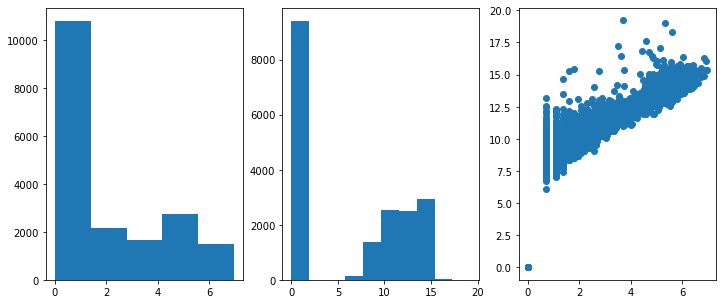

In [182]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_C_log['C_구매횟수1'],5)
ax2.hist(df_C_log['C_총구매액1'],10)
ax3.scatter(df_C_log['C_구매횟수1'],df_C_log['C_총구매액1'])

In [ ]:
df_B_all=pd.merge(df_B_all,df_pivot_B_count, how='left', on='고객번호')
df_B_all.columns=df_c
df_B_all.head()

In [168]:
df_B_all=df_B_all.fillna(0)

(array([1.8859e+04, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 5.40841420e+07, 1.08168284e+08, 1.62252426e+08,
        2.16336568e+08, 2.70420710e+08, 3.24504852e+08, 3.78588994e+08,
        4.32673136e+08, 4.86757278e+08, 5.40841420e+08]),
 <BarContainer object of 10 artists>)

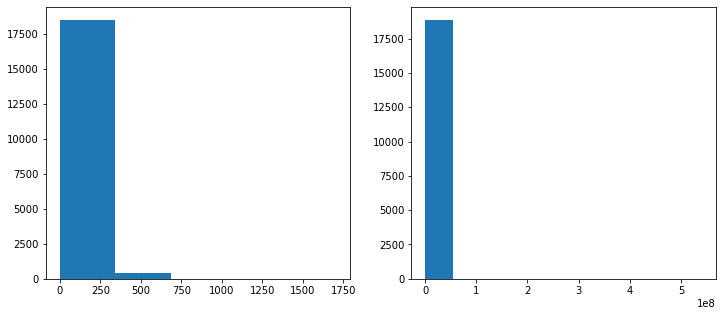

In [169]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(df_B_all['B_구매횟수1'],5)
ax2.hist(df_B_all['B_총구매액1'],10)

(array([5.219e+03, 0.000e+00, 1.000e+00, 3.100e+01, 7.060e+02, 2.846e+03,
        6.592e+03, 3.443e+03, 2.300e+01, 5.000e+00]),
 array([ 0.        ,  2.01086367,  4.02172733,  6.032591  ,  8.04345467,
        10.05431834, 12.065182  , 14.07604567, 16.08690934, 18.097773  ,
        20.10863667]),
 <BarContainer object of 10 artists>)

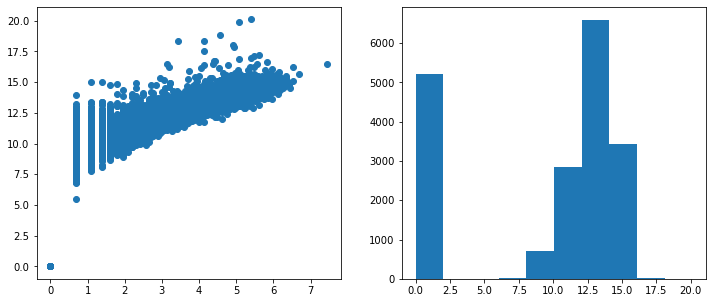

In [170]:
#로그변환
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

x=np.log1p(df_B_all['B_구매횟수1'])
y=np.log1p(df_B_all['B_총구매액1'])
ax1.scatter(x,y)
ax2.hist(y)

In [171]:
#데이터프레임에 로그변환 
df_B_all=df_B_all.fillna(0)
df_B_log=np.log1p(df_B_all)
df_B_log.head()

,고객번호,B_총구매액1,B_총구매액2,B_총구매액3,B_총구매액4,B_총구매액5,B_총구매액6,B_총구매액7,B_총구매액8,B_구매횟수1,B_구매횟수2,B_구매횟수3,B_구매횟수4,B_구매횟수5,B_구매횟수6,B_구매횟수7,B_구매횟수8
0,0.693147,9.973620,0.000000,8.577535,12.705052,12.164162,9.895405,11.740666,11.012825,0.693147,0.000000,1.386294,3.663562,2.484907,0.693147,1.945910,1.609438
1,1.098612,10.309453,0.000000,0.000000,10.626048,11.470842,10.607278,0.000000,0.000000,0.693147,0.000000,0.000000,2.079442,1.791759,1.386294,0.000000,0.000000
2,1.386294,0.000000,0.000000,8.970051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.609438,0.000000,11.320178,12.404624,12.109898,11.220847,12.538401,13.177775,12.387281,0.000000,2.772589,3.091042,3.091042,2.484907,3.258097,3.218876,2.302585
4,1.945910,13.777983,13.809803,14.108818,13.604158,13.846169,13.312243,14.478877,13.766454,5.010635,4.912655,4.905275,4.882802,5.123964,4.779123,5.267858,5.117994


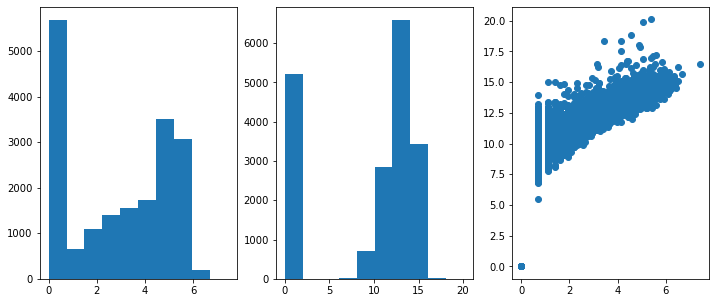

In [172]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_B_log['B_구매횟수1'],10)
ax2.hist(df_B_log['B_총구매액1'],10)
ax3.scatter(df_B_log['B_구매횟수1'],df_B_log['B_총구매액1'])

In [56]:
df_C=df_new[df_new['제휴사']=='C']
df_C

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
1565,C,10805593,6,604,C060401,5836,299,20140515,18,1329,2014,목요일,5,2Q,식료품,편의품
1566,C,10805594,16,1602,C160201,5836,299,20140515,18,12258,2014,목요일,5,2Q,생활잡화,편의품
1567,C,10805595,5,502,C050209,5836,299,20140515,18,10132,2014,목요일,5,2Q,식료품,편의품
1568,C,10805596,5,502,C050211,11348,299,20140515,18,23452,2014,목요일,5,2Q,식료품,편의품
1569,C,10288996,15,1502,C150202,12349,424,20141102,14,3237,2014,일요일,11,4Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28564024,C,8441625,3,302,C030204,8001,268,20150516,16,320,2015,토요일,5,6Q,식료품,편의품
28564025,C,6914530,15,1504,C150405,17508,191,20150321,22,3024,2015,토요일,3,5Q,식료품,편의품
28564026,C,7364645,5,502,C050205,19081,221,20150410,20,7901,2015,금요일,4,6Q,식료품,편의품
28564027,C,7562768,14,1405,C140502,18296,252,20150514,9,3539,2015,목요일,5,6Q,식료품,편의품


In [173]:
#제휴사C분기별
df_pivot_C_sum = pd.pivot_table(df_C,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수
df_pivot_C_sum

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,NaN,206372.0,61789.0,306120.0,107486.0,215756.0,2466.0,94637.0
3,297954.0,482529.0,724429.0,349742.0,282483.0,335595.0,474158.0,213238.0
4,62206.0,278712.0,39531.0,80047.0,39716.0,121198.0,118614.0,89634.0
6,112252.0,111301.0,NaN,86324.0,206337.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,223806.0,116153.0
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,NaN,NaN,23201.0,33920.0,NaN,NaN
19380,NaN,NaN,NaN,NaN,NaN,NaN,47792.0,86257.0
19381,NaN,NaN,NaN,NaN,NaN,NaN,9618.0,12352.0


In [174]:
df_pivot_C_count = pd.pivot_table(df_C,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_pivot_C_count

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,NaN,7.0,10.0,31.0,23.0,34.0,1.0,13.0
3,139.0,208.0,244.0,145.0,87.0,133.0,139.0,93.0
4,12.0,42.0,5.0,20.0,12.0,28.0,15.0,21.0
6,6.0,6.0,NaN,7.0,20.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,42.0,19.0
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
19380,NaN,NaN,NaN,NaN,NaN,NaN,8.0,34.0
19381,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [176]:
df_c=['고객번호']
for i in range(1,9):
    t= 'C_총구매액'+str(i)
    df_c.append(t)
df_C_all=pd.merge(df_ex,df_pivot_C_sum, how='left', on='고객번호')
df_C_all.columns=df_c
df_C_all.head()

,고객번호,C_총구매액1,C_총구매액2,C_총구매액3,C_총구매액4,C_총구매액5,C_총구매액6,C_총구매액7,C_총구매액8
0,1,NaN,206372.0,61789.0,306120.0,107486.0,215756.0,2466.0,94637.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,297954.0,482529.0,724429.0,349742.0,282483.0,335595.0,474158.0,213238.0
3,4,62206.0,278712.0,39531.0,80047.0,39716.0,121198.0,118614.0,89634.0
4,6,112252.0,111301.0,NaN,86324.0,206337.0,NaN,NaN,NaN


In [59]:
c=pd.read_csv('./dataset/제휴사C구매금액.csv',encoding='cp949')
c

,고객번호,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
0,1,NaN,206372.0,61789.0,306120.0,107486.0,215756.0,2466.0,94637.0
1,3,297954.0,482529.0,724429.0,349742.0,282483.0,335595.0,474158.0,213238.0
2,4,62206.0,278712.0,39531.0,80047.0,39716.0,121198.0,118614.0,89634.0
3,6,112252.0,111301.0,NaN,86324.0,206337.0,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,NaN,223806.0,116153.0
...,...,...,...,...,...,...,...,...,...
17105,19379,NaN,NaN,NaN,NaN,23201.0,33920.0,NaN,NaN
17106,19380,NaN,NaN,NaN,NaN,NaN,NaN,47792.0,86257.0
17107,19381,NaN,NaN,NaN,NaN,NaN,NaN,9618.0,12352.0
17108,19382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6601.0


In [60]:
c2=data_cat(c,'제휴사C')
c2.describe()

,고객번호,제휴사C1,제휴사C2,제휴사C3,제휴사C4,제휴사C5,제휴사C6,제휴사C7,제휴사C8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04
mean,9575.723736,3.046159e+05,3.081574e+05,3.697067e+05,2.815646e+05,3.425970e+05,3.482131e+05,3.930491e+05,2.690663e+05
std,5556.931811,2.331054e+06,1.411031e+06,1.717872e+06,1.691130e+06,2.680355e+06,2.468666e+06,2.674060e+06,2.707993e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4763.250000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9537.500000,1.373000e+03,3.780500e+03,5.638000e+03,2.399000e+03,4.192000e+03,4.884500e+03,6.194000e+03,3.119000e+03
75%,14358.750000,1.868760e+05,2.259800e+05,2.656365e+05,1.965165e+05,2.175498e+05,2.541338e+05,2.657298e+05,1.640645e+05
max,19337.000000,2.228260e+08,1.035433e+08,1.303342e+08,1.478177e+08,2.746500e+08,2.842699e+08,2.550733e+08,2.757285e+08


In [27]:
a=pd.read_csv('./dataset/제휴사A구매금액.csv',encoding='cp949')
a

,고객번호,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
0,1,8974372.0,10901831.0,12113989.0,20058580.0,9109367.0,8981582.0,8663959.0,4220424.0
1,2,13868266.0,10506625.0,16767689.0,6238430.0,18595496.0,9758265.0,15540382.0,9915866.0
2,3,NaN,82407.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1226561.0,3483583.0,2466962.0,1355085.0,1642632.0,1658471.0,1748518.0,1000993.0
4,5,3079419.0,2384470.0,2064490.0,353350.0,2138947.0,860499.0,NaN,2137443.0
...,...,...,...,...,...,...,...,...,...
19150,19379,NaN,NaN,NaN,416723.0,400822.0,325455.0,39305.0,665452.0
19151,19380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43212.0
19152,19381,NaN,NaN,NaN,NaN,329804.0,NaN,32661.0,39246.0
19153,19382,NaN,NaN,NaN,NaN,50467.0,134257.0,NaN,NaN


In [42]:
a2=data_cat(a,'제휴사A')
a2.describe()

,고객번호,제휴사A1,제휴사A2,제휴사A3,제휴사A4,제휴사A5,제휴사A6,제휴사A7,제휴사A8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04
mean,9575.723736,3.014864e+06,3.280992e+06,3.203325e+06,3.549885e+06,3.374587e+06,3.634308e+06,3.399686e+06,3.417961e+06
std,5556.931811,7.367133e+06,8.125740e+06,7.630198e+06,1.259714e+07,8.833523e+06,1.013155e+07,9.827967e+06,1.079512e+07
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4763.250000,0.000000e+00,0.000000e+00,0.000000e+00,1.242925e+04,7.079000e+03,8.043000e+03,0.000000e+00,1.294725e+04
50%,9537.500000,5.197280e+05,5.821750e+05,5.764850e+05,6.715520e+05,6.244120e+05,6.717850e+05,5.933815e+05,5.823735e+05
75%,14358.750000,3.455078e+06,3.944614e+06,3.771997e+06,4.026862e+06,3.716173e+06,4.194000e+06,3.754885e+06,3.605403e+06
max,19337.000000,4.442858e+08,4.082247e+08,3.236416e+08,1.169856e+09,4.054762e+08,6.905921e+08,6.931463e+08,7.274181e+08


In [46]:
a2['제휴사A1등급'] = pd.qcut(a2['제휴사A1'], 3, labels = [1,2,3])
a2

,고객번호,제휴사A1,제휴사A2,제휴사A3,제휴사A4,제휴사A5,제휴사A6,제휴사A7,제휴사A8,제휴사A1등급
0,1,8974372.0,10901831.0,12113989.0,20058580.0,9109367.0,8981582.0,8663959.0,4220424.0,3
1,2,13868266.0,10506625.0,16767689.0,6238430.0,18595496.0,9758265.0,15540382.0,9915866.0,3
2,3,0.0,82407.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,1226561.0,3483583.0,2466962.0,1355085.0,1642632.0,1658471.0,1748518.0,1000993.0,2
4,6,1056050.0,2103394.0,2233041.0,1721084.0,2422858.0,2365637.0,2020858.0,1695049.0,2
...,...,...,...,...,...,...,...,...,...,...
18861,19333,423966.0,636362.0,458047.0,217453.0,315209.0,195541.0,189291.0,219455.0,2
18862,19334,0.0,0.0,0.0,0.0,0.0,0.0,430219.0,0.0,1
18863,19335,0.0,0.0,123149.0,107308.0,70290.0,992559.0,0.0,0.0,1
18864,19336,442432.0,3396167.0,3570613.0,5220264.0,2919383.0,3887504.0,7093722.0,4078050.0,2


In [47]:
def tr(df):
    df_col=df.columns[1:]

    asa = df.iloc[:,1:-1].describe()
    des_25 = (asa.loc['25%'].sum())/7
    des_50 = (asa.loc['50%'].sum())/7
    des_75 = (asa.loc['75%'].sum())/7

    #등급나누기
    def cat_sales(x):
        if x == 0:
            return 0
        elif (x > 0) and (x <=des_25):
            return 1
        elif (x > des_25) and (x <=des_50):
            return 2
        elif (x > des_50) and (x <=des_75):
            return 3
        elif (x > des_75):
            return 4
    for a in df_col:
        df[a]=df[a].apply(lambda x : cat_sales(x))
    return df

In [48]:
a22=tr(a2)
a22

,고객번호,제휴사A1,제휴사A2,제휴사A3,제휴사A4,제휴사A5,제휴사A6,제휴사A7,제휴사A8,제휴사A1등급
0,1,4,4,4,4,4,4,4,3,1
1,2,4,4,4,4,4,4,4,4,1
2,3,0,2,0,0,0,0,0,0,1
3,4,3,3,3,3,3,3,3,3,1
4,6,3,3,3,3,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...
18861,19333,2,2,2,2,2,2,2,2,1
18862,19334,0,0,0,0,0,0,2,0,1
18863,19335,0,0,2,2,2,3,0,0,1
18864,19336,2,3,3,4,3,3,4,3,1


In [62]:
a22.to_csv('./dataset/제휴사A구매등급.csv',encoding='cp949')

In [65]:
df_B

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,6937011,13,1305,B130502,18575,11,20151228,17,2735,2015,월요일,12,8Q,기호품,편의품
28593026,B,10561833,10,1003,B100305,15886,116,20150526,20,4847,2015,화요일,5,6Q,식료품,편의품
28593027,B,10561838,14,1402,B140201,11525,116,20150526,16,4504,2015,화요일,5,6Q,식료품,편의품
28593028,B,8233755,21,2108,B210802,9470,32,20150117,16,627,2015,토요일,1,5Q,생활잡화,편의품


In [66]:
df_pivot_B2 = pd.pivot_table(df_B,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
df_pivot_B2

QUARTER,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
고객번호,,,,,,,,
1,1.0,NaN,3.0,38.0,11.0,1.0,6.0,4.0
2,1.0,NaN,NaN,7.0,5.0,3.0,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,15.0,21.0,21.0,11.0,25.0,24.0,9.0
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,NaN,NaN,7.0,12.0,10.0,NaN
19380,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN
19381,NaN,NaN,NaN,NaN,140.0,227.0,227.0,197.0


In [67]:
b2_new = pd.merge(b2,df_pivot_B2,how='left',on='고객번호')
b2_new

,고객번호,제휴사B1,제휴사B2,제휴사B3,제휴사B4,제휴사B5,제휴사B6,제휴사B7,제휴사B8,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
0,1,21452.0,0.0,5310.0,329407.0,191790.0,19838.0,125575.0,60646.0,1.0,NaN,3.0,38.0,11.0,1.0,6.0,4.0
1,2,30014.0,0.0,0.0,41193.0,95878.0,40427.0,0.0,0.0,1.0,NaN,NaN,7.0,5.0,3.0,NaN,NaN
2,3,0.0,0.0,7863.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,4,0.0,82468.0,243926.0,181660.0,74670.0,278841.0,528487.0,239732.0,NaN,15.0,21.0,21.0,11.0,25.0,24.0,9.0
4,6,963167.0,994308.0,1340854.0,809488.0,1031132.0,604551.0,1941315.0,952126.0,149.0,135.0,134.0,131.0,167.0,118.0,193.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,179382.0,305122.0,195221.0,186458.0,88752.0,59580.0,13514.0,33725.0,42.0,72.0,43.0,68.0,39.0,14.0,2.0,22.0
18862,19334,820744.0,2629567.0,2806054.0,2416344.0,1610453.0,670568.0,29733.0,277509.0,132.0,447.0,453.0,317.0,197.0,111.0,2.0,15.0
18863,19335,877654.0,2626922.0,2361524.0,1496413.0,1821534.0,1824639.0,1383571.0,1572355.0,83.0,218.0,235.0,203.0,205.0,193.0,146.0,213.0
18864,19336,0.0,0.0,0.0,0.0,0.0,0.0,26466.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [68]:
b2_new=b2_new.fillna(0)

In [69]:
b2_new

,고객번호,제휴사B1,제휴사B2,제휴사B3,제휴사B4,제휴사B5,제휴사B6,제휴사B7,제휴사B8,1Q,2Q,3Q,4Q,5Q,6Q,7Q,8Q
0,1,21452.0,0.0,5310.0,329407.0,191790.0,19838.0,125575.0,60646.0,1.0,0.0,3.0,38.0,11.0,1.0,6.0,4.0
1,2,30014.0,0.0,0.0,41193.0,95878.0,40427.0,0.0,0.0,1.0,0.0,0.0,7.0,5.0,3.0,0.0,0.0
2,3,0.0,0.0,7863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,82468.0,243926.0,181660.0,74670.0,278841.0,528487.0,239732.0,0.0,15.0,21.0,21.0,11.0,25.0,24.0,9.0
4,6,963167.0,994308.0,1340854.0,809488.0,1031132.0,604551.0,1941315.0,952126.0,149.0,135.0,134.0,131.0,167.0,118.0,193.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,179382.0,305122.0,195221.0,186458.0,88752.0,59580.0,13514.0,33725.0,42.0,72.0,43.0,68.0,39.0,14.0,2.0,22.0
18862,19334,820744.0,2629567.0,2806054.0,2416344.0,1610453.0,670568.0,29733.0,277509.0,132.0,447.0,453.0,317.0,197.0,111.0,2.0,15.0
18863,19335,877654.0,2626922.0,2361524.0,1496413.0,1821534.0,1824639.0,1383571.0,1572355.0,83.0,218.0,235.0,203.0,205.0,193.0,146.0,213.0
18864,19336,0.0,0.0,0.0,0.0,0.0,0.0,26466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


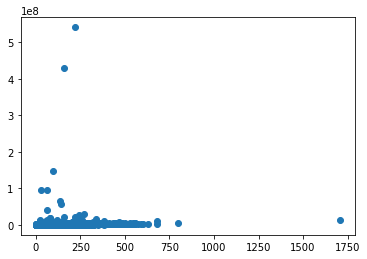

In [73]:
import matplotlib.pyplot as plt
plt.scatter(b2_new['1Q'],b2_new['제휴사B1'])

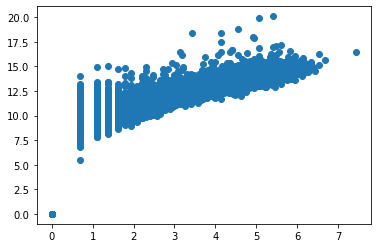

In [77]:
import numpy as np
x=np.log1p(b2_new['1Q'])
y=np.log1p(b2_new['제휴사B1'])
plt.scatter(x,y)

In [49]:
for i in range(1,8):
    display(a22.iloc[:,i].value_counts())

0    5121
3    4969
2    4756
4    3928
1      92
Name: 제휴사A1, dtype: int64

0    5042
3    4771
2    4594
4    4383
1      76
Name: 제휴사A2, dtype: int64

0    5085
3    4957
2    4535
4    4213
1      76
Name: 제휴사A3, dtype: int64

2    4966
3    4918
4    4469
0    4404
1     109
Name: 제휴사A4, dtype: int64

3    5027
2    4954
0    4591
4    4205
1      89
Name: 제휴사A5, dtype: int64

2    4806
3    4805
0    4604
4    4586
1      65
Name: 제휴사A6, dtype: int64

3    4964
2    4839
0    4764
4    4223
1      76
Name: 제휴사A7, dtype: int64

In [61]:
b=pd.read_csv('./dataset/제휴사B구매금액.csv',encoding='cp949')
b2=data_cat(b,'제휴사B')
b2.describe()

,고객번호,제휴사B1,제휴사B2,제휴사B3,제휴사B4,제휴사B5,제휴사B6,제휴사B7,제휴사B8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04
mean,9575.723736,7.176478e+05,7.740300e+05,8.629890e+05,6.456772e+05,7.395369e+05,7.602065e+05,8.537679e+05,5.486497e+05
std,5556.931811,5.364666e+06,7.283094e+06,5.773563e+06,1.400679e+06,1.563234e+06,1.092529e+06,1.662093e+06,8.641676e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4763.250000,0.000000e+00,0.000000e+00,0.000000e+00,2.184000e+03,4.348250e+03,0.000000e+00,8.992750e+03,0.000000e+00
50%,9537.500000,2.361005e+05,2.449955e+05,3.290150e+05,2.732500e+05,3.113740e+05,3.209855e+05,3.614685e+05,2.240120e+05
75%,14358.750000,1.057268e+06,1.103858e+06,1.288843e+06,1.039906e+06,1.205526e+06,1.284970e+06,1.403136e+06,9.113102e+05
max,19337.000000,5.408414e+08,8.604176e+08,6.894661e+08,9.086311e+07,1.536055e+08,4.306552e+07,1.272610e+08,4.757018e+07


In [55]:
b2['제휴사B1등급'] = pd.qcut(b2['제휴사B1'], 3, labels = [1,2,3])
b2

,고객번호,제휴사B1,제휴사B2,제휴사B3,제휴사B4,제휴사B5,제휴사B6,제휴사B7,제휴사B8,제휴사B1등급
0,1,2,0,2,3,2,2,2,2,1
1,2,2,0,0,2,2,2,0,0,1
2,3,0,0,2,0,0,0,0,0,1
3,4,0,2,2,2,2,2,3,2,1
4,6,3,3,4,3,3,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...
18861,19333,2,3,2,2,2,2,2,2,1
18862,19334,3,4,4,4,4,3,2,2,2
18863,19335,3,4,4,4,4,4,4,4,2
18864,19336,0,0,0,0,0,0,2,0,1


In [51]:
b22=tr(b2)
b22

,고객번호,제휴사B1,제휴사B2,제휴사B3,제휴사B4,제휴사B5,제휴사B6,제휴사B7,제휴사B8
0,1,2,0,2,3,2,2,2,2
1,2,2,0,0,2,2,2,0,0
2,3,0,0,2,0,0,0,0,0
3,4,0,2,2,2,2,2,3,2
4,6,3,3,4,3,3,3,4,3
...,...,...,...,...,...,...,...,...,...
18861,19333,2,3,2,2,2,2,2,2
18862,19334,3,4,4,4,4,3,2,2
18863,19335,3,4,4,4,4,4,4,4
18864,19336,0,0,0,0,0,0,2,0


In [52]:
for i in range(1,8):
    display(a22.iloc[:,i].value_counts())

0    5121
3    4969
2    4756
4    3928
1      92
Name: 제휴사A1, dtype: int64

0    5042
3    4771
2    4594
4    4383
1      76
Name: 제휴사A2, dtype: int64

0    5085
3    4957
2    4535
4    4213
1      76
Name: 제휴사A3, dtype: int64

2    4966
3    4918
4    4469
0    4404
1     109
Name: 제휴사A4, dtype: int64

3    5027
2    4954
0    4591
4    4205
1      89
Name: 제휴사A5, dtype: int64

2    4806
3    4805
0    4604
4    4586
1      65
Name: 제휴사A6, dtype: int64

3    4964
2    4839
0    4764
4    4223
1      76
Name: 제휴사A7, dtype: int64

In [222]:
df_new

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,6937011,13,1305,B130502,18575,11,20151228,17,2735,2015,월요일,12,8Q,기호품,편의품
28593026,B,10561833,10,1003,B100305,15886,116,20150526,20,4847,2015,화요일,5,6Q,식료품,편의품
28593027,B,10561838,14,1402,B140201,11525,116,20150526,16,4504,2015,화요일,5,6Q,식료품,편의품
28593028,B,8233755,21,2108,B210802,9470,32,20150117,16,627,2015,토요일,1,5Q,생활잡화,편의품


In [223]:
df_com=df_new[df_new['소비재분류']=='편의품']
df_com.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품


In [279]:
df_com.index.type()

AttributeError: 'Int64Index' object has no attribute 'type'

In [276]:
df_pre=df_new[df_new['소비재분류']=='선매품']
df_pre.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
66,B,8828531,30,3002,B300201,17132,46,20150723,12,67574,2015,목요일,7,7Q,의류잡화,선매품
67,B,8828532,29,2904,B290402,17392,46,20150723,21,16893,2015,목요일,7,7Q,의류잡화,선매품
68,B,8828534,29,2903,B290302,17555,46,20150723,14,16893,2015,목요일,7,7Q,의류잡화,선매품
97,B,8725576,68,6801,B680101,10906,44,20150228,15,7990,2015,토요일,2,5Q,의류잡화,선매품
209,B,8750671,27,2703,B270308,7505,44,20150715,14,10136,2015,수요일,7,7Q,레저취미,선매품


AttributeError: 'list' object has no attribute 'type'

In [240]:
df_pivot_com_sum = pd.pivot_table(df_com,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_pivot_com_count = pd.pivot_table(df_com,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수

In [237]:
# 데이터프레임 수정
def data_cat(df,y):
#     df = pd.read_csv(x,encoding = 'cp949')
#     df=df.reset_index()
    df_c=['고객번호']
    for i in range(1,9):
        t= y+str(i)
        df_c.append(t)
    df_main_n=pd.merge(df_ex,df, how='left', on='고객번호')
    df_main_n.columns= df_c
    df_main_n.fillna(0,inplace=True)
    return df_main_n

In [234]:
df_c=['고객번호']
y='a'
for i in range(1,9):
    t= y+str(i)
    df_c.append(t)
df_c

['고객번호', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8']

In [366]:
df_pivot_com_sum

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8
0,1,1286884.0,1064865.0,2410552.0,2134000.0,1846726.0,1301649.0,577274.0,917643.0
1,2,2988276.0,2605412.0,4888476.0,1774936.0,2040951.0,3259312.0,1706685.0,1648163.0
2,3,297954.0,482529.0,701900.0,349742.0,282483.0,335595.0,474158.0,213238.0
3,4,686358.0,1025882.0,630038.0,395993.0,826033.0,837331.0,740376.0,504799.0
4,6,1138653.0,1170564.0,1691299.0,1013425.0,1544973.0,640312.0,1916618.0,1019851.0
...,...,...,...,...,...,...,...,...,...
18861,19333,482901.0,801431.0,317016.0,295185.0,687014.0,375763.0,130330.0,260963.0
18862,19334,788271.0,2729746.0,2864455.0,2356936.0,1265985.0,729212.0,89554.0,225240.0
18863,19335,685330.0,1830265.0,1968923.0,1440059.0,1644799.0,1487271.0,1267213.0,1242130.0
18864,19336,14761.0,832536.0,262929.0,104123.0,174075.0,2681.0,523468.0,73287.0


In [238]:
df_pivot_com_sum=data_cat(df_pivot_com_sum,'편_총구매액')
df_pivot_com_sum.head()

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8
0,1,1286884.0,1064865.0,2410552.0,2134000.0,1846726.0,1301649.0,577274.0,917643.0
1,2,2988276.0,2605412.0,4888476.0,1774936.0,2040951.0,3259312.0,1706685.0,1648163.0
2,3,297954.0,482529.0,701900.0,349742.0,282483.0,335595.0,474158.0,213238.0
3,4,686358.0,1025882.0,630038.0,395993.0,826033.0,837331.0,740376.0,504799.0
4,6,1138653.0,1170564.0,1691299.0,1013425.0,1544973.0,640312.0,1916618.0,1019851.0


In [241]:
df_pivot_com_count=data_cat(df_pivot_com_count,'편_총구매횟수')
df_pivot_com_count.head()

,고객번호,편_총구매횟수1,편_총구매횟수2,편_총구매횟수3,편_총구매횟수4,편_총구매횟수5,편_총구매횟수6,편_총구매횟수7,편_총구매횟수8
0,1,74.0,63.0,84.0,152.0,116.0,101.0,28.0,47.0
1,2,139.0,120.0,97.0,110.0,89.0,80.0,79.0,84.0
2,3,139.0,208.0,245.0,145.0,87.0,133.0,139.0,93.0
3,4,83.0,139.0,58.0,66.0,102.0,111.0,88.0,81.0
4,6,172.0,153.0,145.0,152.0,214.0,127.0,197.0,177.0


In [246]:

df_p_com = pd.merge(df_pivot_com_sum,df_pivot_com_count,on='고객번호')
df_p_com

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8,편_총구매횟수1,편_총구매횟수2,편_총구매횟수3,편_총구매횟수4,편_총구매횟수5,편_총구매횟수6,편_총구매횟수7,편_총구매횟수8
0,1,1286884.0,1064865.0,2410552.0,2134000.0,1846726.0,1301649.0,577274.0,917643.0,74.0,63.0,84.0,152.0,116.0,101.0,28.0,47.0
1,2,2988276.0,2605412.0,4888476.0,1774936.0,2040951.0,3259312.0,1706685.0,1648163.0,139.0,120.0,97.0,110.0,89.0,80.0,79.0,84.0
2,3,297954.0,482529.0,701900.0,349742.0,282483.0,335595.0,474158.0,213238.0,139.0,208.0,245.0,145.0,87.0,133.0,139.0,93.0
3,4,686358.0,1025882.0,630038.0,395993.0,826033.0,837331.0,740376.0,504799.0,83.0,139.0,58.0,66.0,102.0,111.0,88.0,81.0
4,6,1138653.0,1170564.0,1691299.0,1013425.0,1544973.0,640312.0,1916618.0,1019851.0,172.0,153.0,145.0,152.0,214.0,127.0,197.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,482901.0,801431.0,317016.0,295185.0,687014.0,375763.0,130330.0,260963.0,94.0,148.0,68.0,93.0,113.0,61.0,32.0,70.0
18862,19334,788271.0,2729746.0,2864455.0,2356936.0,1265985.0,729212.0,89554.0,225240.0,129.0,492.0,489.0,341.0,220.0,158.0,28.0,44.0
18863,19335,685330.0,1830265.0,1968923.0,1440059.0,1644799.0,1487271.0,1267213.0,1242130.0,80.0,247.0,232.0,229.0,237.0,187.0,177.0,187.0
18864,19336,14761.0,832536.0,262929.0,104123.0,174075.0,2681.0,523468.0,73287.0,1.0,9.0,14.0,5.0,10.0,1.0,11.0,4.0


In [247]:
df_p_com.columns

Index(['고객번호', '편_총구매액1', '편_총구매액2', '편_총구매액3', '편_총구매액4', '편_총구매액5',
       '편_총구매액6', '편_총구매액7', '편_총구매액8', '편_총구매횟수1', '편_총구매횟수2', '편_총구매횟수3',
       '편_총구매횟수4', '편_총구매횟수5', '편_총구매횟수6', '편_총구매횟수7', '편_총구매횟수8'],
      dtype='object')

In [243]:
df_p_com.to_csv('./dataset/편의품.csv',encoding='cp949')

In [245]:
df_p_com = df_p_com[['고객번호', '편_총구매액1', '편_총구매액2', '편_총구매액3', '편_총구매액4', '편_총구매액5','편_총구매액6', '편_총구매액7']]
df_p_com

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7
0,1,1286884.0,1064865.0,2410552.0,2134000.0,1846726.0,1301649.0,577274.0
1,2,2988276.0,2605412.0,4888476.0,1774936.0,2040951.0,3259312.0,1706685.0
2,3,297954.0,482529.0,701900.0,349742.0,282483.0,335595.0,474158.0
3,4,686358.0,1025882.0,630038.0,395993.0,826033.0,837331.0,740376.0
4,6,1138653.0,1170564.0,1691299.0,1013425.0,1544973.0,640312.0,1916618.0
...,...,...,...,...,...,...,...,...
18861,19333,482901.0,801431.0,317016.0,295185.0,687014.0,375763.0,130330.0
18862,19334,788271.0,2729746.0,2864455.0,2356936.0,1265985.0,729212.0,89554.0
18863,19335,685330.0,1830265.0,1968923.0,1440059.0,1644799.0,1487271.0,1267213.0
18864,19336,14761.0,832536.0,262929.0,104123.0,174075.0,2681.0,523468.0


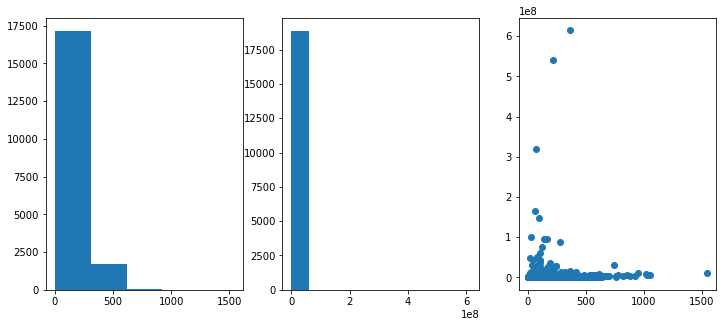

In [249]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_p_com['편_총구매횟수1'],5)
ax2.hist(df_p_com['편_총구매액1'],10)
ax3.scatter(df_p_com['편_총구매횟수1'],df_p_com['편_총구매액1'])

In [250]:
df_com_log=df_p_com.copy()
df_com_log.iloc[:,1:]=df_com_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_com_log.head()

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8,편_총구매횟수1,편_총구매횟수2,편_총구매횟수3,편_총구매횟수4,편_총구매횟수5,편_총구매횟수6,편_총구매횟수7,편_총구매횟수8
0,1,14.067735,13.878360,14.695367,14.573509,14.428925,14.079143,13.266074,13.729565,4.317488,4.158883,4.442651,5.030438,4.762174,4.624973,3.367296,3.871201
1,2,14.910208,14.773102,15.402391,14.389275,14.528927,14.997027,14.350064,14.315172,4.941642,4.795791,4.584967,4.709530,4.499810,4.394449,4.382027,4.442651
2,3,12.604698,13.086798,13.461548,12.764954,12.551377,12.723663,13.069298,12.270169,4.941642,5.342334,5.505332,4.983607,4.477337,4.897840,4.941642,4.543295
3,4,13.439156,13.841064,13.353537,12.889154,13.624391,13.637976,13.514915,13.131918,4.430817,4.941642,4.077537,4.204693,4.634729,4.718499,4.488636,4.406719
4,6,13.945357,13.972997,14.341008,13.828847,14.250518,13.369712,14.466073,13.835168,5.153292,5.036953,4.983607,5.030438,5.370638,4.852030,5.288267,5.181784


In [256]:
df_com_log.describe()

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8,편_총구매횟수1,편_총구매횟수2,편_총구매횟수3,편_총구매횟수4,편_총구매횟수5,편_총구매횟수6,편_총구매횟수7,편_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,13.600164,13.674793,13.873935,13.610731,13.798977,13.822786,13.915723,13.458004,4.678368,4.760921,4.807214,4.812583,4.834701,4.866712,4.847128,4.728282
std,5556.931811,1.113261,0.960204,0.941659,0.855607,0.868862,0.815992,0.875838,0.994378,0.962620,0.920850,0.896842,0.855019,0.855801,0.881103,0.907065,0.922143
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,13.247029,13.343907,13.514962,13.282464,13.450114,13.484308,13.555250,13.130286,4.143135,4.248495,4.304065,4.317488,4.330733,4.343805,4.317488,4.204693
50%,9537.500000,13.741501,13.791626,13.964708,13.698927,13.873347,13.919745,14.009192,13.579936,4.875197,4.941642,4.983607,4.976734,4.997212,5.036953,5.030438,4.897840
75%,14358.750000,14.139232,14.166033,14.345374,14.051655,14.247254,14.279098,14.386863,13.953760,5.379897,5.433722,5.459586,5.438079,5.468060,5.517453,5.521461,5.402677
max,19337.000000,20.236607,20.572870,20.351539,18.843021,19.492937,19.486448,19.386581,19.435818,7.340836,7.270313,7.333023,7.311886,7.185387,7.394493,7.303843,7.389564


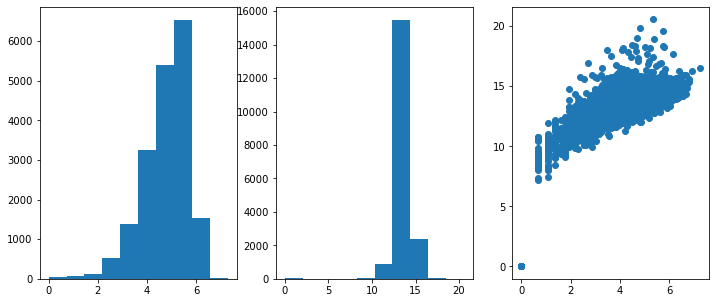

In [260]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_com_log['편_총구매횟수2'],10)
ax2.hist(df_com_log['편_총구매액2'],10)
ax3.scatter(df_com_log['편_총구매횟수2'],df_com_log['편_총구매액2'])

In [262]:
_,bins = np.histogram(df_com_log['편_총구매액1'])
bins

array([ 0.        ,  2.02366067,  4.04732134,  6.07098201,  8.09464267,
       10.11830334, 12.14196401, 14.16562468, 16.18928535, 18.21294602,
       20.23660669])

In [ ]:
def tr(df):
    df_col=df.columns[1:]

    asa = df.iloc[:,1:-1].describe()
    des_25 = (asa.loc['25%'].sum())/7
    des_50 = (asa.loc['50%'].sum())/7
    des_75 = (asa.loc['75%'].sum())/7

    #등급나누기
    def cat_sales(x):
        if x == 0:
            return 0
        elif (x > 0) and (x <=des_25):
            return 1
        elif (x > des_25) and (x <=des_50):
            return 2
        elif (x > des_50) and (x <=des_75):
            return 3
        elif (x > des_75):
            return 4
    for a in df_col:
        df[a]=df[a].apply(lambda x : cat_sales(x))
    return df

In [259]:
df_com_log1 = df_com_log[['고객번호', '편_총구매액1', '편_총구매액2', '편_총구매액3', '편_총구매액4', '편_총구매액5','편_총구매액6', '편_총구매액7','편_총구매액8']]
df_com_log1 = tr(df_com_log1)


C:\Users\ns2ju\AppData\Local\Temp/ipykernel_6676/4008565393.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a]=df[a].apply(lambda x : cat_sales(x))


,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8
0,1,3,3,4,4,4,3,1,2
1,2,4,4,4,4,4,4,4,4
2,3,1,1,2,1,1,1,1,1
3,4,2,2,1,1,2,2,2,1
4,6,3,3,4,2,4,1,4,2
...,...,...,...,...,...,...,...,...,...
18861,19333,1,2,1,1,2,1,1,1
18862,19334,2,4,4,4,3,2,1,1
18863,19335,2,4,4,3,4,3,3,3
18864,19336,1,2,1,1,1,1,1,1


In [368]:
df_com_log1.to_csv('./dataset/편의품_des.csv',encoding='cp949')

In [263]:
for i in range(1,8):
    display(df_com_log1.iloc[:,i].value_counts())

1    5912
2    4876
3    4216
4    3812
0      50
Name: 편_총구매액1, dtype: int64

1    5241
2    4980
3    4594
4    4021
0      30
Name: 편_총구매액2, dtype: int64

4    6035
3    4724
2    4221
1    3860
0      26
Name: 편_총구매액3, dtype: int64

1    5948
2    5639
3    4358
4    2898
0      23
Name: 편_총구매액4, dtype: int64

4    4895
2    4842
3    4728
1    4380
0      21
Name: 편_총구매액5, dtype: int64

4    5239
3    5019
2    4501
1    4094
0      13
Name: 편_총구매액6, dtype: int64

4    6556
3    4740
2    3847
1    3711
0      12
Name: 편_총구매액7, dtype: int64

In [261]:
df_com_log2 = df_com_log[['고객번호', '편_총구매횟수1', '편_총구매횟수2', '편_총구매횟수3', '편_총구매횟수4', '편_총구매횟수5','편_총구매횟수6', '편_총구매횟수7','편_총구매횟수8']]
df_com_log2 = tr(df_com_log2)
df_com_log2


C:\Users\ns2ju\AppData\Local\Temp/ipykernel_6676/4008565393.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a]=df[a].apply(lambda x : cat_sales(x))


,고객번호,편_총구매횟수1,편_총구매횟수2,편_총구매횟수3,편_총구매횟수4,편_총구매횟수5,편_총구매횟수6,편_총구매횟수7,편_총구매횟수8
0,1,2,1,2,3,2,2,1,1
1,2,2,2,2,2,2,2,2,2
2,3,2,3,4,3,2,2,2,2
3,4,2,2,1,1,2,2,2,2
4,6,3,3,3,3,3,2,3,3
...,...,...,...,...,...,...,...,...,...
18861,19333,2,3,1,2,2,1,1,1
18862,19334,2,4,4,4,3,3,1,1
18863,19335,2,4,3,3,4,3,3,3
18864,19336,1,1,1,1,1,1,1,1


In [264]:
for i in range(1,8):
    display(df_com_log2.iloc[:,i].value_counts())

1    5409
2    4888
3    4561
4    3958
0      50
Name: 편_총구매횟수1, dtype: int64

1    4892
2    4831
3    4654
4    4459
0      30
Name: 편_총구매횟수2, dtype: int64

2    4797
3    4737
4    4706
1    4600
0      26
Name: 편_총구매횟수3, dtype: int64

2    4961
3    4947
1    4479
4    4456
0      23
Name: 편_총구매횟수4, dtype: int64

3    4830
4    4801
2    4775
1    4439
0      21
Name: 편_총구매횟수5, dtype: int64

4    5278
3    4639
2    4573
1    4363
0      13
Name: 편_총구매횟수6, dtype: int64

4    5276
3    4563
2    4518
1    4497
0      12
Name: 편_총구매횟수7, dtype: int64

In [275]:
df_com_log2.to_csv('./dataset/편의품등급_des.csv',encoding='cp949')

In [273]:
def hist_cat(x):

    if x <= bins[1]:
        return 1
    elif( x > bins[1]) and (x <= bins[2]) :
        return 2
    elif( x > bins[2]) and (x <=bins[3]) :
        return 3    
    elif( x > bins[3]) and (x <=bins[4]) :
        return 4
    elif( x > bins[4]) :
        return 5    
#     elif( x > bins[4]) and (x <=bins[5]) :
#         return 5    
#     elif( x > bins[5]) and (x <=bins[6]) :
#         return 6    
#     elif( x > bins[6]) and (x <=bins[7]) :
#         return 7    
#     elif( x > bins[7]) and (x <=bins[8]) :
#         return 8    
#     elif( x > bins[8]) and (x <=bins[9]) :
#         return 9  
#     elif( x > bins[9]):
#         return 10    
    
df_col=df_com_log3.columns[1:]

for a in df_col:
    _,bins =np.histogram(df_com_log3[a],bins= 5) 
    print(bins)
    df_com_log3[a]=df_com_log3[a].apply(lambda x : hist_cat(x))   
df_com_log3

[ 0.          4.04732134  8.09464267 12.14196401 16.18928535 20.23660669]
[ 0.          4.11457399  8.22914798 12.34372197 16.45829596 20.57286995]
[ 0.          4.07030788  8.14061576 12.21092364 16.28123152 20.3515394 ]


C:\Users\ns2ju\AppData\Local\Temp/ipykernel_6676/258874282.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_log3[a]=df_com_log3[a].apply(lambda x : hist_cat(x))


[ 0.          3.76860422  7.53720844 11.30581265 15.07441687 18.84302109]
[ 0.          3.89858744  7.79717488 11.69576232 15.59434976 19.4929372 ]
[ 0.          3.89728964  7.79457928 11.69186892 15.58915856 19.48644821]
[ 0.          3.87731616  7.75463231 11.63194847 15.50926463 19.38658078]
[ 0.          3.88716356  7.77432712 11.66149068 15.54865423 19.43581779]


,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8
0,1,4,4,4,4,4,4,4,4
1,2,4,4,4,4,4,4,4,4
2,3,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4
4,6,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
18861,19333,4,4,4,4,4,4,4,4
18862,19334,4,4,4,4,4,4,3,4
18863,19335,4,4,4,4,4,4,4,4
18864,19336,3,4,4,4,4,3,4,3


In [274]:
for i in range(1,8):
    display(df_com_log3.iloc[:,i].value_counts())

4    17802
3      946
5       65
1       50
2        3
Name: 편_총구매액1, dtype: int64

4    17848
3      947
5       33
1       30
2        8
Name: 편_총구매액2, dtype: int64

4    18233
3      531
5       72
1       26
2        4
Name: 편_총구매액3, dtype: int64

4    18483
5      205
3      153
1       23
2        2
Name: 편_총구매액4, dtype: int64

4    18488
3      193
5      162
1       21
2        2
Name: 편_총구매액5, dtype: int64

4    18522
3      230
5       97
1       13
2        4
Name: 편_총구매액6, dtype: int64

4    18311
5      286
3      254
1       12
2        3
Name: 편_총구매액7, dtype: int64

In [272]:
df_com_log3=df_com_log[['고객번호', '편_총구매액1', '편_총구매액2', '편_총구매액3', '편_총구매액4', '편_총구매액5','편_총구매액6', '편_총구매액7','편_총구매액8']]
df_com_log3

,고객번호,편_총구매액1,편_총구매액2,편_총구매액3,편_총구매액4,편_총구매액5,편_총구매액6,편_총구매액7,편_총구매액8
0,1,14.067735,13.878360,14.695367,14.573509,14.428925,14.079143,13.266074,13.729565
1,2,14.910208,14.773102,15.402391,14.389275,14.528927,14.997027,14.350064,14.315172
2,3,12.604698,13.086798,13.461548,12.764954,12.551377,12.723663,13.069298,12.270169
3,4,13.439156,13.841064,13.353537,12.889154,13.624391,13.637976,13.514915,13.131918
4,6,13.945357,13.972997,14.341008,13.828847,14.250518,13.369712,14.466073,13.835168
...,...,...,...,...,...,...,...,...,...
18861,19333,13.087569,13.594155,12.666711,12.595361,13.440111,12.836717,11.777833,12.472138
18862,19334,13.577598,14.819719,14.867889,14.672873,14.051362,13.499721,11.402608,12.324926
18863,19335,13.437657,14.419972,14.492998,14.180195,14.313129,14.212454,14.052331,14.032339
18864,19336,9.599812,13.632233,12.479643,11.553338,12.067247,7.894318,13.168233,11.202152


In [287]:
df_pivot_pre_sum = pd.pivot_table(df_pre,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_pivot_pre_count = pd.pivot_table(df_pre,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수

In [288]:
df_pivot_pre_sum=data_cat(df_pivot_pre_sum,'선_총구매액')
df_pivot_pre_count=data_cat(df_pivot_pre_count,'선_총구매횟수')

In [289]:
df_p_pre = pd.merge(df_pivot_pre_sum,df_pivot_pre_count,on='고객번호')
df_p_pre

,고객번호,선_총구매액1,선_총구매액2,선_총구매액3,선_총구매액4,선_총구매액5,선_총구매액6,선_총구매액7,선_총구매액8,선_총구매횟수1,선_총구매횟수2,선_총구매횟수3,선_총구매횟수4,선_총구매횟수5,선_총구매횟수6,선_총구매횟수7,선_총구매횟수8
0,1,7592379.0,9984829.0,9257433.0,18457501.0,6811013.0,7525785.0,8083520.0,3380893.0,42.0,52.0,46.0,55.0,42.0,31.0,38.0,26.0
1,2,10529863.0,7865366.0,11660595.0,4119667.0,15054795.0,6686785.0,13785156.0,8109973.0,44.0,34.0,37.0,21.0,51.0,32.0,43.0,30.0
2,3,0.0,82407.0,30392.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,589616.0,2729264.0,2033611.0,1194194.0,770078.0,1072661.0,1334831.0,659321.0,9.0,32.0,23.0,17.0,10.0,17.0,18.0,14.0
4,6,843730.0,1897009.0,1718888.0,1525873.0,2029389.0,2178676.0,1777514.0,1540651.0,9.0,31.0,24.0,25.0,17.0,27.0,25.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,71835.0,0.0,0.0,26516.0,0.0,41661.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
18862,19334,32473.0,57582.0,21229.0,120416.0,398232.0,66260.0,456573.0,159712.0,3.0,5.0,3.0,10.0,9.0,9.0,4.0,4.0
18863,19335,181843.0,921929.0,501297.0,300105.0,330715.0,569146.0,250540.0,243648.0,8.0,32.0,26.0,15.0,13.0,22.0,11.0,14.0
18864,19336,380830.0,2094526.0,2597712.0,4427422.0,2417749.0,3422858.0,5886856.0,3517325.0,3.0,33.0,28.0,32.0,28.0,21.0,22.0,33.0


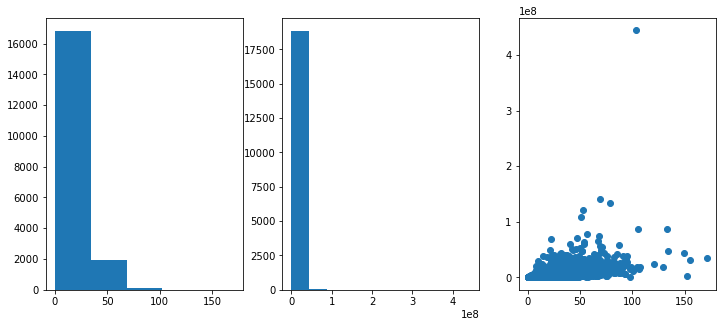

In [290]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_p_pre['선_총구매횟수1'],5)
ax2.hist(df_p_pre['선_총구매액1'],10)
ax3.scatter(df_p_pre['선_총구매횟수1'],df_p_pre['선_총구매액1'])

In [291]:
df_pre_log=df_p_pre.copy()
df_pre_log.iloc[:,1:]=df_pre_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_pre_log.head()

,고객번호,선_총구매액1,선_총구매액2,선_총구매액3,선_총구매액4,선_총구매액5,선_총구매액6,선_총구매액7,선_총구매액8,선_총구매횟수1,선_총구매횟수2,선_총구매횟수3,선_총구매횟수4,선_총구매횟수5,선_총구매횟수6,선_총구매횟수7,선_총구매횟수8
0,1,15.842656,16.116577,16.040937,16.730981,15.734052,15.833846,15.905338,15.033651,3.761200,3.970292,3.850148,4.025352,3.761200,3.465736,3.663562,3.295837
1,2,16.169726,15.877980,16.271726,15.231283,16.527207,15.715644,16.439103,15.908605,3.806662,3.555348,3.637586,3.091042,3.951244,3.496508,3.784190,3.433987
2,3,0.000000,11.319438,10.321968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,13.287228,14.819543,14.525324,13.992983,13.554248,13.885654,14.104316,13.398967,2.302585,3.496508,3.178054,2.890372,2.397895,2.890372,2.944439,2.708050
4,6,13.645589,14.455790,14.357189,14.238078,14.523246,14.594228,14.390727,14.247716,2.302585,3.465736,3.218876,3.258097,2.890372,3.332205,3.258097,3.637586


In [299]:
df_p_pre.to_csv('./dataset/선매품금액횟수_원본.csv',encoding='cp949')

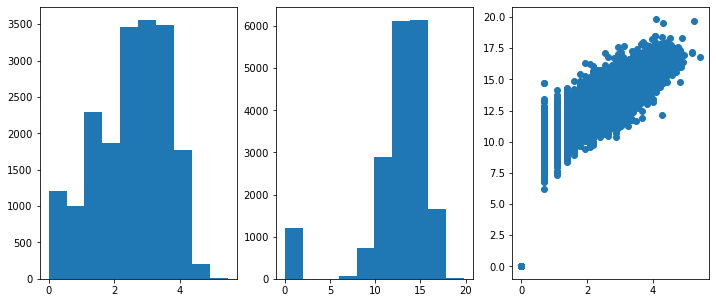

In [293]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_pre_log['선_총구매횟수2'],10)
ax2.hist(df_pre_log['선_총구매액2'],10)
ax3.scatter(df_pre_log['선_총구매횟수2'],df_pre_log['선_총구매액2'])

In [295]:
df_pre_log1 = df_pre_log[['고객번호', '선_총구매액1', '선_총구매액2', '선_총구매액3', '선_총구매액4', '선_총구매액5','선_총구매액6', '선_총구매액7','선_총구매액8']]
df_pre_log1 = tr(df_pre_log1)
for i in range(1,8):
    display(df_pre_log1.iloc[:,i].value_counts())
df_pre_log1

C:\Users\ns2ju\AppData\Local\Temp/ipykernel_6676/4008565393.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a]=df[a].apply(lambda x : cat_sales(x))


3    4698
2    4665
4    4436
1    3760
0    1307
Name: 선_총구매액1, dtype: int64

4    4904
3    4655
2    4556
1    3545
0    1206
Name: 선_총구매액2, dtype: int64

3    4835
2    4811
4    4545
1    3580
0    1095
Name: 선_총구매액3, dtype: int64

4    5004
2    4726
3    4699
1    3527
0     910
Name: 선_총구매액4, dtype: int64

2    4734
4    4626
3    4626
1    3774
0    1106
Name: 선_총구매액5, dtype: int64

4    5036
2    4727
3    4649
1    3515
0     939
Name: 선_총구매액6, dtype: int64

3    4829
2    4814
4    4483
1    3678
0    1062
Name: 선_총구매액7, dtype: int64

,고객번호,선_총구매액1,선_총구매액2,선_총구매액3,선_총구매액4,선_총구매액5,선_총구매액6,선_총구매액7,선_총구매액8
0,1,4,4,4,4,4,4,4,4
1,2,4,4,4,4,4,4,4,4
2,3,0,1,1,0,0,0,0,0
3,4,2,4,3,3,3,3,3,3
4,6,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,0,1,0,1,0,0
18862,19334,1,1,1,1,2,1,2,2
18863,19335,2,3,2,2,2,2,2,2
18864,19336,2,3,3,4,3,4,4,4


In [297]:
df_pre_log1.to_csv('./dataset/선매품등급_des.csv',encoding='cp949')

In [300]:
df_spe=df_new[df_new['소비재분류']=='전문품']
df_spe.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
1452,A,4322490,8,801,A080121,13376,1,20150516,12,1079847,2015,토요일,5,6Q,명품,전문품
1524,A,4322479,8,801,A080122,2485,1,20150516,17,31098,2015,토요일,5,6Q,명품,전문품
2184,A,4322487,8,801,A080116,1516,1,20150516,18,13404258,2015,토요일,5,6Q,명품,전문품
2185,A,4322488,8,801,A080103,4523,1,20150516,16,285243,2015,토요일,5,6Q,명품,전문품
2186,A,4322489,8,801,A080107,9192,1,20150516,13,1276085,2015,토요일,5,6Q,명품,전문품


In [301]:
df_pivot_spe_sum = pd.pivot_table(df_spe,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_pivot_spe_count = pd.pivot_table(df_spe,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수

In [303]:
df_pivot_spe_sum=data_cat(df_pivot_spe_sum,'전_총구매액')
df_pivot_spe_count=data_cat(df_pivot_spe_count,'전_총구매횟수')

In [304]:
df_p_spe = pd.merge(df_pivot_spe_sum,df_pivot_spe_count,on='고객번호')
df_p_spe

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
0,1,0.0,0.0,267256.0,0.0,509218.0,271517.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,385020.0,1561444.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,191459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6,0.0,40173.0,64399.0,0.0,0.0,63268.0,175691.0,24705.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18862,19334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18863,19335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18864,19336,0.0,0.0,0.0,168499.0,0.0,223369.0,406907.0,297487.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0


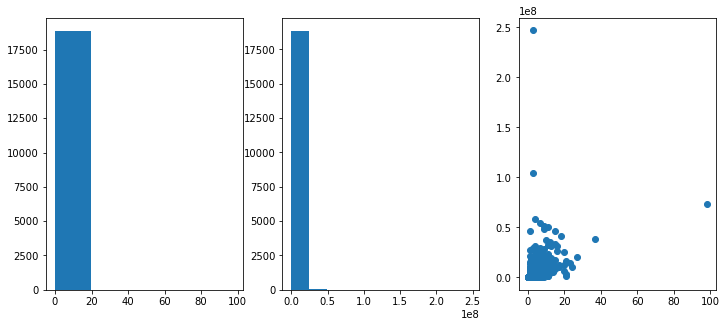

In [305]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
x=df_p_spe['전_총구매횟수1']
y=df_p_spe['전_총구매액1']
ax1.hist(x,5)
ax2.hist(y,10)
ax3.scatter(x,y)

In [306]:
df_spe_log=df_p_spe.copy()
df_spe_log.iloc[:,1:]=df_spe_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_spe_log.head()

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
0,1,0.0,0.000000,12.495966,0.000000,13.140633,12.511784,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000
1,2,0.0,0.000000,0.000000,12.861053,14.261122,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,1.609438,0.000000,0.000000,0.000000
2,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.162434,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
4,6,0.0,10.600975,11.072869,0.000000,0.000000,11.055151,12.076488,10.114801,0.0,0.693147,0.693147,0.000000,0.000000,0.693147,1.098612,0.693147


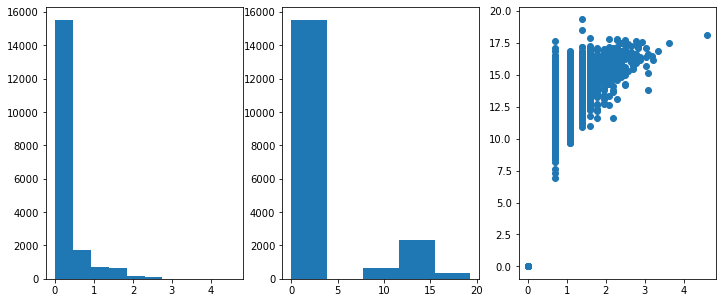

In [329]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
x=df_spe_log['전_총구매횟수1']
y=df_spe_log['전_총구매액1']
ax1.hist(x,10)
ax2.hist(y,5)
ax3.scatter(x,y)

In [321]:
_,bins = np.histogram(y,5)
bins

array([ 0.        ,  3.86496213,  7.72992427, 11.5948864 , 15.45984853,
       19.32481066])

In [308]:
df_spe_log.describe()

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,2.335828,2.776316,2.681659,2.964941,2.777995,3.159438,2.997790,3.103807,0.189051,0.235832,0.218334,0.253963,0.232484,0.278845,0.255189,0.270709
std,5556.931811,5.091003,5.405235,5.325059,5.533717,5.407777,5.666369,5.551767,5.613611,0.456178,0.511841,0.480504,0.526974,0.503733,0.564066,0.529307,0.551001
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9537.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14358.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19337.000000,19.324811,19.183527,18.979608,18.810134,19.443985,19.460158,18.879573,19.069634,4.595120,4.532599,4.406719,3.610918,3.637586,3.891820,4.025352,3.583519


In [317]:
df_spe_log_n=df_spe_log[['고객번호']]
for a in df_spe_log[1:]:
    df_spe_log_n[a]=df_spe_log.loc[df_spe_log[a]!=0,a]
df_spe_log_n

C:\Users\ns2ju\AppData\Local\Temp/ipykernel_6676/1425231491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spe_log_n[a]=df_spe_log.loc[df_spe_log[a]!=0,a]


,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
0,1,NaN,NaN,12.495966,NaN,13.140633,12.511784,NaN,NaN,NaN,NaN,0.693147,NaN,0.693147,0.693147,NaN,NaN
1,2,NaN,NaN,NaN,12.861053,14.261122,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,1.609438,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,12.162434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,NaN
4,6,NaN,10.600975,11.072869,NaN,NaN,11.055151,12.076488,10.114801,NaN,0.693147,0.693147,NaN,NaN,0.693147,1.098612,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18862,19334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18863,19335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18864,19336,NaN,NaN,NaN,12.034691,NaN,12.316585,12.916342,12.603129,NaN,NaN,NaN,0.693147,NaN,0.693147,1.098612,0.693147


In [332]:
df_spe_log1=df_spe_log.copy()

In [333]:
def hist_cat(x):

    if x <= bins[1]:
        return 0
    elif( x > bins[1]) and (x <= bins[2]) :
        return 1
    elif( x > bins[2]) and (x <=bins[3]) :
        return 2    
    elif( x > bins[3]) and (x <=bins[4]) :
        return 3
    elif( x > bins[4]) :
        return 4    
#     elif( x > bins[4]) and (x <=bins[5]) :
#         return 5    
#     elif( x > bins[5]) and (x <=bins[6]) :
#         return 6    
#     elif( x > bins[6]) and (x <=bins[7]) :
#         return 7    
#     elif( x > bins[7]) and (x <=bins[8]) :
#         return 8    
#     elif( x > bins[8]) and (x <=bins[9]) :
#         return 9  
#     elif( x > bins[9]):
#         return 10    
    
df_col=df_spe_log1.columns[1:]

for a in df_col:
    _,bins =np.histogram(df_spe_log1[a],bins= 5) 
    print(bins)
    df_spe_log1[a]=df_spe_log1[a].apply(lambda x : hist_cat(x))   
df_spe_log1

[ 0.          3.86496213  7.72992427 11.5948864  15.45984853 19.32481066]
[ 0.         3.8367054  7.6734108 11.5101162 15.3468216 19.183527 ]
[ 0.          3.79592152  7.59184304 11.38776457 15.18368609 18.97960761]
[ 0.          3.76202672  7.52405343 11.28608015 15.04810687 18.81013358]
[ 0.          3.888797    7.777594   11.66639101 15.55518801 19.44398501]
[ 0.          3.89203157  7.78406313 11.6760947  15.56812627 19.46015784]
[ 0.          3.77591464  7.55182928 11.32774391 15.10365855 18.87957319]
[ 0.          3.81392684  7.62785368 11.44178052 15.25570736 19.06963419]
[0.         0.91902397 1.83804794 2.75707191 3.67609588 4.59511985]
[0.         0.9065199  1.8130398  2.7195597  3.62607959 4.53259949]
[0.         0.88134385 1.7626877  2.64403155 3.5253754  4.40671925]
[0.         0.72218358 1.44436717 2.16655075 2.88873433 3.61091791]
[0.         0.72751723 1.45503446 2.1825517  2.91006893 3.63758616]
[0.         0.77836406 1.55672812 2.33509218 3.11345624 3.8918203 ]
[0.   

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
0,1,0,0,3,0,3,3,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
4,6,0,2,2,0,0,2,3,2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18862,19334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18863,19335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18864,19336,0,0,0,3,0,3,3,3,0,0,0,0,0,0,1,0


In [334]:
for i in range(1,8):
    display(df_spe_log1.iloc[:,i].value_counts())
df_spe_log1

0    15522
3     2328
2      669
4      344
1        3
Name: 전_총구매액1, dtype: int64

0    14845
3     2674
2      896
4      447
1        4
Name: 전_총구매액2, dtype: int64

0    14968
3     2578
2      847
4      473
Name: 전_총구매액3, dtype: int64

0    14563
3     2668
2      920
4      715
Name: 전_총구매액4, dtype: int64

0    14841
3     2583
2     1048
4      392
1        2
Name: 전_총구매액5, dtype: int64

0    14291
3     2862
2     1247
4      465
1        1
Name: 전_총구매액6, dtype: int64

0    14507
3     2658
2     1005
4      694
1        2
Name: 전_총구매액7, dtype: int64

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
0,1,0,0,3,0,3,3,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
4,6,0,2,2,0,0,2,3,2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18862,19334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18863,19335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18864,19336,0,0,0,3,0,3,3,3,0,0,0,0,0,0,1,0


In [335]:
df_spe_log1.to_csv('./dataset/MainCategory/전문품_hist.csv',encoding='cp949')

In [337]:
df_p_spe.to_csv('./dataset/MainCategory/전문품금액횟수_원본.csv',encoding='cp949')

In [339]:
df_oth = df_new[df_new['소비재분류']=='기타']

In [340]:
df_pivot_oth_sum = pd.pivot_table(df_oth,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_pivot_oth_count = pd.pivot_table(df_oth,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수

In [342]:
df_pivot_oth_sum=data_cat(df_pivot_oth_sum,'기_총구매액')
df_pivot_oth_count=data_cat(df_pivot_oth_count,'기_총구매횟수')

In [343]:
df_p_oth = pd.merge(df_pivot_oth_sum,df_pivot_oth_count,on='고객번호')
df_p_oth

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8,기_총구매횟수1,기_총구매횟수2,기_총구매횟수3,기_총구매횟수4,기_총구매횟수5,기_총구매횟수6,기_총구매횟수7,기_총구매횟수8
0,1,116561.0,58509.0,245847.0,102606.0,241686.0,118225.0,131206.0,77171.0,5.0,2.0,11.0,7.0,13.0,7.0,7.0,5.0
1,2,380141.0,35847.0,218618.0,0.0,34184.0,37532.0,98095.0,157730.0,1.0,1.0,5.0,0.0,1.0,4.0,4.0,5.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,12793.0,89617.0,86770.0,26605.0,160907.0,148518.0,128953.0,166239.0,1.0,6.0,4.0,4.0,10.0,13.0,11.0,12.0
4,6,149086.0,101257.0,99309.0,77598.0,85965.0,87932.0,92350.0,61968.0,11.0,7.0,8.0,10.0,6.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,48612.0,140053.0,336252.0,82210.0,173346.0,176207.0,153484.0,169035.0,13.0,22.0,22.0,13.0,19.0,17.0,11.0,20.0
18862,19334,0.0,0.0,24291.0,23413.0,55018.0,27344.0,0.0,0.0,0.0,0.0,3.0,4.0,6.0,3.0,0.0,0.0
18863,19335,55598.0,114653.0,151057.0,71211.0,248896.0,1002633.0,232009.0,175998.0,7.0,16.0,16.0,12.0,29.0,26.0,21.0,29.0
18864,19336,46841.0,494754.0,709972.0,520220.0,337592.0,238596.0,302957.0,200692.0,4.0,36.0,38.0,38.0,25.0,10.0,16.0,13.0


In [344]:
df_p_oth.describe()

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8,기_총구매횟수1,기_총구매횟수2,기_총구매횟수3,기_총구매횟수4,기_총구매횟수5,기_총구매횟수6,기_총구매횟수7,기_총구매횟수8
count,18866.000000,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,1.886600e+04,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,9.591057e+04,1.003579e+05,1.242831e+05,1.181085e+05,1.284348e+05,1.276249e+05,1.397997e+05,1.016338e+05,3.762218,4.138821,4.532545,6.122602,6.135641,6.189123,6.502491,5.885826
std,5556.931811,5.355638e+05,3.258976e+05,5.341262e+05,4.915118e+05,4.364322e+05,3.052751e+05,3.796944e+05,3.211793e+05,5.756161,6.233956,6.579105,7.452998,7.413986,7.627990,7.964413,7.403189
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,0.000000e+00,0.000000e+00,0.000000e+00,6.857250e+03,7.787000e+03,7.916750e+03,1.004900e+04,5.536000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9537.500000,2.497550e+04,2.966600e+04,3.872400e+04,4.838150e+04,5.334800e+04,5.616150e+04,6.340600e+04,4.172550e+04,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,14358.750000,1.037018e+05,1.142350e+05,1.434705e+05,1.401732e+05,1.541310e+05,1.558110e+05,1.749030e+05,1.224402e+05,5.000000,6.000000,6.000000,9.000000,9.000000,9.000000,9.000000,8.000000
max,19337.000000,6.336614e+07,2.101528e+07,4.183732e+07,5.099568e+07,3.759214e+07,1.608833e+07,3.022635e+07,2.712137e+07,102.000000,121.000000,99.000000,141.000000,88.000000,104.000000,154.000000,125.000000


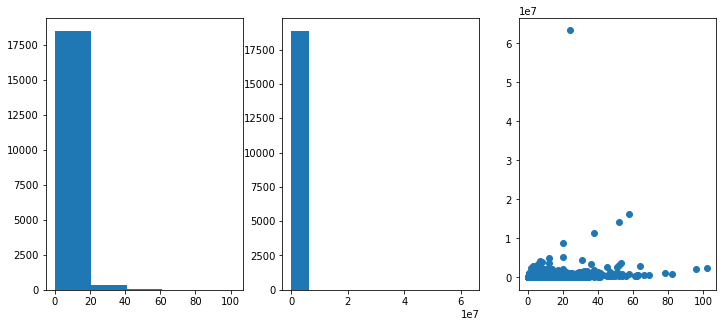

In [345]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
x=df_p_oth['기_총구매횟수1']
y=df_p_oth['기_총구매액1']
ax1.hist(x,5)
ax2.hist(y,10)
ax3.scatter(x,y)

In [346]:
df_oth_log=df_p_oth.copy()
df_oth_log.iloc[:,1:]=df_oth_log.iloc[:,1:].apply(lambda x:np.log1p(x))
df_oth_log.head()

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8,기_총구매횟수1,기_총구매횟수2,기_총구매횟수3,기_총구매횟수4,기_총구매횟수5,기_총구매횟수6,기_총구매횟수7,기_총구매횟수8
0,1,11.666179,10.976953,12.412469,11.538661,12.395399,11.680353,11.784532,11.253792,1.791759,1.098612,2.484907,2.079442,2.639057,2.079442,2.079442,1.791759
1,2,12.848300,10.487043,12.295086,0.000000,10.439542,10.532976,11.493702,11.968646,0.693147,0.693147,1.791759,0.000000,0.693147,1.609438,1.609438,1.791759
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,9.456732,11.403311,11.371028,10.188892,11.988588,11.908468,11.767211,12.021188,0.693147,1.945910,1.609438,1.609438,2.397895,2.639057,2.484907,2.564949
4,6,11.912285,11.525427,11.506002,11.259310,11.361707,11.384330,11.433352,11.034390,2.484907,2.079442,2.197225,2.397895,1.945910,1.791759,1.609438,1.609438


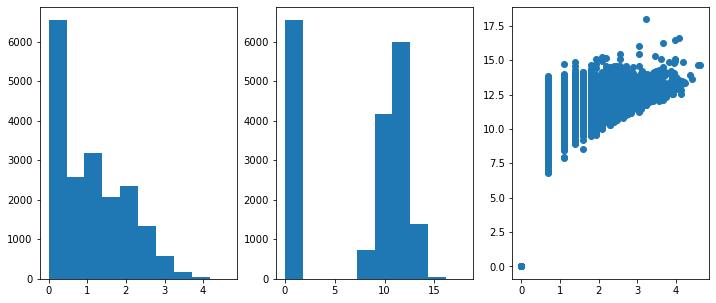

In [348]:
fig = plt.figure(figsize=(12,5))
# figure가 2x2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
x=df_oth_log['기_총구매횟수1']
y=df_oth_log['기_총구매액1']
ax1.hist(x,10)
ax2.hist(y,10)
ax3.scatter(x,y)

In [353]:
df_oth_log.describe()

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8,기_총구매횟수1,기_총구매횟수2,기_총구매횟수3,기_총구매횟수4,기_총구매횟수5,기_총구매횟수6,기_총구매횟수7,기_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,7.233963,7.427451,7.811545,8.908256,8.994228,9.013354,9.174437,8.742408,1.060991,1.115663,1.186528,1.496360,1.497995,1.500090,1.537360,1.459916
std,5556.931811,5.376000,5.372331,5.334438,4.563199,4.601861,4.615198,4.590275,4.568006,0.970418,0.998816,1.013726,1.002759,1.002937,1.006656,1.017392,0.997205
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,0.000000,0.000000,0.000000,8.833207,8.960339,8.976862,9.215319,8.619208,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147
50%,9537.500000,10.125690,10.297791,10.564240,10.786893,10.884610,10.936004,11.057330,10.638892,1.098612,1.098612,1.098612,1.609438,1.609438,1.609438,1.609438,1.609438
75%,14358.750000,11.549284,11.646022,11.873892,11.850642,11.945565,11.956405,12.071993,11.715387,1.791759,1.945910,1.945910,2.302585,2.302585,2.302585,2.302585,2.197225
max,19337.000000,17.964440,16.860761,17.549299,17.747251,17.442306,16.593605,17.224225,17.115832,4.634729,4.804021,4.605170,4.955827,4.488636,4.653960,5.043425,4.836282


In [356]:
def tr_e(df):
    df_col=df.columns[1:]

    asa = df.iloc[:,1:-1].describe()
    des_25 = (asa.loc['25%'].sum())/4
    des_50 = (asa.loc['50%'].sum())/7
    des_75 = (asa.loc['75%'].sum())/7

    #등급나누기
    def cat_sales(x):
        if x == 0:
            return 0
        elif (x > 0) and (x <=des_25):
            return 1
        elif (x > des_25) and (x <=des_50):
            return 2
        elif (x > des_50) and (x <=des_75):
            return 3
        elif (x > des_75):
            return 4
    for a in df_col:
        df[a]=df[a].apply(lambda x : cat_sales(x))
    return df

In [357]:
df_oth_log1 = df_oth_log[['고객번호', '기_총구매액1', '기_총구매액2', '기_총구매액3', '기_총구매액4', '기_총구매액5','기_총구매액6', '기_총구매액7', '기_총구매액8']]
df_oth_log1 = tr_e(df_oth_log1)
for i in range(1,8):
    display(df_oth_log1.iloc[:,i].value_counts())
df_oth_log1

C:\Users\ns2ju\AppData\Local\Temp/ipykernel_6676/644640773.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a]=df[a].apply(lambda x : cat_sales(x))


0    6550
3    4174
2    3782
4    3620
1     740
Name: 기_총구매액1, dtype: int64

0    6323
3    4294
4    4003
2    3610
1     636
Name: 기_총구매액2, dtype: int64

0    5830
4    4852
3    4295
2    3204
1     685
Name: 기_총구매액3, dtype: int64

3    5146
4    4754
2    4050
0    3701
1    1215
Name: 기_총구매액4, dtype: int64

4    5183
3    5121
2    3820
0    3703
1    1039
Name: 기_총구매액5, dtype: int64

4    5274
3    5165
0    3712
2    3680
1    1035
Name: 기_총구매액6, dtype: int64

4    5835
3    5088
0    3574
2    3426
1     943
Name: 기_총구매액7, dtype: int64

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8
0,1,3,3,4,3,4,3,3,3
1,2,4,2,4,0,2,2,3,4
2,3,0,0,0,0,0,0,0,0
3,4,2,3,3,2,4,4,3,4
4,6,4,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
18861,19333,3,4,4,3,4,4,4,4
18862,19334,0,0,2,2,3,2,0,0
18863,19335,3,3,4,3,4,4,4,4
18864,19336,3,4,4,4,4,4,4,4


In [358]:
df_oth_log1.to_csv('./dataset/MainCategory/기타_des.csv',encoding='cp949')

In [365]:
df_spe_log.describe()

,고객번호,전_총구매액1,전_총구매액2,전_총구매액3,전_총구매액4,전_총구매액5,전_총구매액6,전_총구매액7,전_총구매액8,전_총구매횟수1,전_총구매횟수2,전_총구매횟수3,전_총구매횟수4,전_총구매횟수5,전_총구매횟수6,전_총구매횟수7,전_총구매횟수8
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,9575.723736,2.335828,2.776316,2.681659,2.964941,2.777995,3.159438,2.997790,3.103807,0.189051,0.235832,0.218334,0.253963,0.232484,0.278845,0.255189,0.270709
std,5556.931811,5.091003,5.405235,5.325059,5.533717,5.407777,5.666369,5.551767,5.613611,0.456178,0.511841,0.480504,0.526974,0.503733,0.564066,0.529307,0.551001
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9537.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14358.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19337.000000,19.324811,19.183527,18.979608,18.810134,19.443985,19.460158,18.879573,19.069634,4.595120,4.532599,4.406719,3.610918,3.637586,3.891820,4.025352,3.583519


In [360]:
df_p_oth

,고객번호,기_총구매액1,기_총구매액2,기_총구매액3,기_총구매액4,기_총구매액5,기_총구매액6,기_총구매액7,기_총구매액8,기_총구매횟수1,기_총구매횟수2,기_총구매횟수3,기_총구매횟수4,기_총구매횟수5,기_총구매횟수6,기_총구매횟수7,기_총구매횟수8
0,1,116561.0,58509.0,245847.0,102606.0,241686.0,118225.0,131206.0,77171.0,5.0,2.0,11.0,7.0,13.0,7.0,7.0,5.0
1,2,380141.0,35847.0,218618.0,0.0,34184.0,37532.0,98095.0,157730.0,1.0,1.0,5.0,0.0,1.0,4.0,4.0,5.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,12793.0,89617.0,86770.0,26605.0,160907.0,148518.0,128953.0,166239.0,1.0,6.0,4.0,4.0,10.0,13.0,11.0,12.0
4,6,149086.0,101257.0,99309.0,77598.0,85965.0,87932.0,92350.0,61968.0,11.0,7.0,8.0,10.0,6.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,48612.0,140053.0,336252.0,82210.0,173346.0,176207.0,153484.0,169035.0,13.0,22.0,22.0,13.0,19.0,17.0,11.0,20.0
18862,19334,0.0,0.0,24291.0,23413.0,55018.0,27344.0,0.0,0.0,0.0,0.0,3.0,4.0,6.0,3.0,0.0,0.0
18863,19335,55598.0,114653.0,151057.0,71211.0,248896.0,1002633.0,232009.0,175998.0,7.0,16.0,16.0,12.0,29.0,26.0,21.0,29.0
18864,19336,46841.0,494754.0,709972.0,520220.0,337592.0,238596.0,302957.0,200692.0,4.0,36.0,38.0,38.0,25.0,10.0,16.0,13.0


In [361]:
df_p_oth.to_csv('./dataset/MainCategory/기타금액횟수_원본.csv',encoding='cp949')

In [370]:
df_food = df_new[(df_new['상품분류']=='식료품')|(df_new['상품분류']=='식료품 ')]

In [373]:
df_food2 = df_new[(df_new['상품분류']=='식료품')|(df_new['상품분류']=='식료품 ')|(df_new['상품분류']=='기호품')|(df_new['상품분류']=='고급식료품')]

In [372]:
df_clo = df_new[(df_new['상품분류']=='의류잡화')|(df_new['상품분류']=='웨딩')]

In [ ]:
df_clo2 = df_new[(df_new['상품분류']=='의류잡화')|(df_new['상품분류']=='웨딩')|(df_new['상품분류']=='명품')|(df_new['상품분류']=='귀금속')]

In [374]:
df_life = df_new[(df_new['상품분류']=='생활잡화')]

In [ ]:
df_life2 = df_new[(df_new['상품분류']=='생활잡화')|(df_new['상품분류']=='화장품')]

In [380]:
#다시구해
df_food_p_sum = df_pivot_oth_sum = pd.pivot_table(df_food,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '구매금액',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_food_p_count = pd.pivot_table(df_food,                # 피벗할 데이터프레임
                     index = '고객번호',    # 행 위치에 들어갈 열
                     columns = 'QUARTER',    # 열 위치에 들어갈 열
                     values = '영수증번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수

MemoryError: Unable to allocate 153. MiB for an array with shape (20001824,) and data type int64

In [378]:
df_food2

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월,QUARTER,상품분류,소비재분류
0,B,8919510,5,505,B050502,17485,48,20150921,21,2252,2015,월요일,9,7Q,식료품,편의품
1,B,8919510,5,510,B051005,17485,48,20150921,21,1408,2015,월요일,9,7Q,식료품,편의품
2,B,8919510,46,4603,B460304,17485,48,20150921,21,26793,2015,월요일,9,7Q,식료품,편의품
3,B,8919510,52,5210,B521004,17485,48,20150921,21,28831,2015,월요일,9,7Q,식료품,편의품
4,B,8919510,52,5214,B521402,17485,48,20150921,21,14416,2015,월요일,9,7Q,식료품,편의품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593024,B,7951678,14,1405,B140503,18026,26,20150528,20,1780,2015,목요일,5,6Q,식료품,편의품
28593025,B,6937011,13,1305,B130502,18575,11,20151228,17,2735,2015,월요일,12,8Q,기호품,편의품
28593026,B,10561833,10,1003,B100305,15886,116,20150526,20,4847,2015,화요일,5,6Q,식료품,편의품
28593027,B,10561838,14,1402,B140201,11525,116,20150526,16,4504,2015,화요일,5,6Q,식료품,편의품
